### Data Selection and EDA

#### 1. Idea Narrative

#### 2. Data

In [5]:
# Import library to use functions (read_csv, etc.)
import pandas as pd

In [6]:
# Assigns IVR_data variable to dataset from fake credit card callers IVR dataset
IVR_data = pd.read_csv('credit_card_calls.csv')
# Displays the first and last few rows from dataset
IVR_data

,Call ID,Caller ID,Account Number,Agent ID,Timestamp,Call Duration,Call Transcript,Sentiment Score,Topic
0,1,001-457-380-0182x4265,NaN,AGENT205,2024-10-20T18:18:21.279734,NaN,Can you guide me through the activation process?,-0.085963,Card Activation
1,2,599.667.1264x0627,ACC000481,AGENT144,2024-10-20T18:20:44.279734,400.0,How do I report my card as lost?,-0.625687,Lost Card Reporting
2,3,271-992-2369x2744,ACC000954,AGENT101,2024-10-20T18:25:37.279734,500.0,What do I need to qualify for a limit increase?,0.384147,Credit Limit Increase
3,4,001-271-236-7042x88602,ACC000331,AGENT043,2024-10-28T13:22:21.279734,500.0,Can you block my lost card immediately?,-0.538936,Lost Card Reporting
4,5,(690)717-4084x310,ACC000622,AGENT139,2024-10-09T08:48:21.279734,300.0,I see a charge I didn't authorize.,0.993353,Transaction Dispute
...,...,...,...,...,...,...,...,...,...
749995,749996,+1-742-775-8278x339,ACC000887,AGENT222,2024-11-02T21:10:21.279734,400.0,Can you provide my account statement?,NaN,Account Inquiry
749996,749997,001-394-989-3868x171,ACC000961,AGENT231,2024-10-31T19:48:21.279734,500.0,I want to set up automatic payments.,NaN,Payment Processing
749997,749998,001-502-412-7611x335,ACC000837,AGENT194,2024-10-31T19:52:48.279734,400.0,I have questions about my latest bill.,NaN,Billing Questions
749998,749999,775-300-7133,ACC000725,AGENT054,2024-11-03T15:37:21.279734,400.0,"My payment didn’t go through, can you check?",NaN,Payment Processing


In [7]:
# Displays number of rows and columns of dataset
IVR_data.shape

(750000, 9)

In [8]:
# Returns the sum of record count with True when evaluating field values for NaN from the IVR data file, sorts records in descending order by counts
IVR_data.isnull().sum().sort_values(ascending=False)

Sentiment Score    196875
Agent ID            74754
Call Transcript     74272
Account Number      18841
Call Duration       18841
Call ID                 0
Caller ID               0
Timestamp               0
Topic                   0
dtype: int64

In [9]:
# Returns statistical data about the numeric columns in the dataset
IVR_data.describe() 

,Call ID,Call Duration,Sentiment Score
count,750000.000000,731159.000000,553125.000000
mean,375000.500000,364.119569,-0.045285
std,216506.495284,134.168809,0.572856
min,1.000000,100.000000,-0.999991
25%,187500.750000,300.000000,-0.553835
50%,375000.500000,400.000000,-0.115441
75%,562500.250000,500.000000,0.482043
max,750000.000000,600.000000,0.999999


#### 3. Graphs

In [11]:
# Import matplotlib.pyplot and seaborn to create and format graphs 
import matplotlib.pyplot as plt
import seaborn as sns

##### Graph 1
The graphs show that I may look into more of the call details around the topic of 'Billing Questions' since they appear to be shorter in duration than the rest.  This may be a large leap, but if scammers are using this topic then it may indicate that they are less likely to stay in the IVR for longer periods of time.  The customers that want to connect to an agent also leave the IVR earlier.  Whereas, customers able to service their own accounts based on the variety of topics that the fictitious IVR offers spend longer in the IVR.   

In [13]:
# Determines the average duration spent in IVR rounded to 2 decimal places based on assigned IVR Topic
# Also sorts values descending to show highest to lowest average IVR time and stores results in avg_duration variable
avg_duration = round(IVR_data.groupby('Topic')['Call Duration'].agg('mean').sort_values(ascending=False),2)
avg_duration

Topic
Lost Card Reporting      364.62
Transaction Dispute      364.47
Payment Processing       364.40
Account Inquiry          364.36
Card Activation          364.32
Fraud Detection          364.17
Credit Limit Increase    363.87
Connect to Agent         363.66
Billing Questions        363.21
Name: Call Duration, dtype: float64

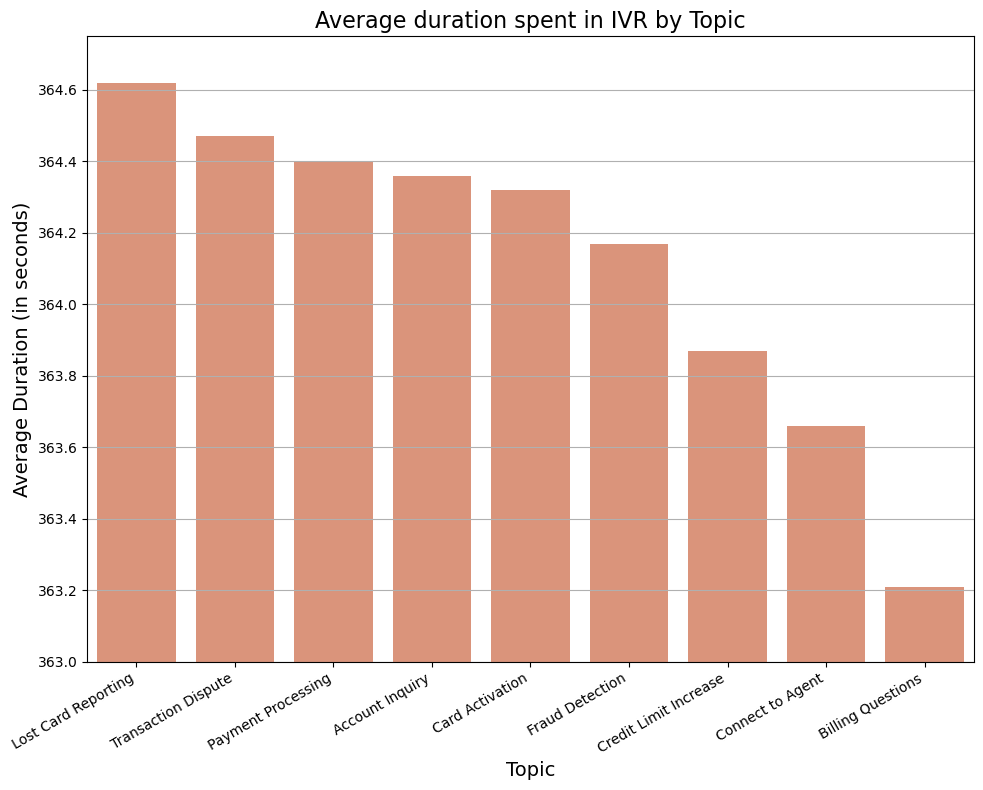

In [14]:
# Sets figure size to cover more of screen
plt.figure(figsize=(10, 8))

# Sets palette for plots using seaborn's flare palette
sns.set_palette("flare")

# Creates barplot showing average duration in seconds spent in IVR by topic
sns.barplot(avg_duration)

# Assigns title to plot
plt.title('Average duration spent in IVR by Topic', fontsize=16)

# Displays label on X axis
plt.xlabel('Topic', fontsize=14)

# Displays label on Y axis
plt.ylabel('Average Duration (in seconds)', fontsize=14)

# Sets x axis tick marks to display rotated at a 30 degree angle 
# and sets labels to align with correct bars
plt.xticks(rotation=30, ha='right')

# Shows grid lines on Y axis
plt.grid(axis='y')

# Sets Y axis to between 363 and 364.75 seconds to allow better view 
plt.ylim(363, 364.75)

# Tightens up display of graph
plt.tight_layout()

# Shows graph without method description displaying
plt.show()

##### Graph 2
This graph shows the top 25 agents that would have taken the most calls if the caller had not self-serviced in the IVR.  I am going to investigate the number of calls that agents actually took by looking at just the topic of 'Connect to Agent' for the third graph to see if there are any more noticeable differences.

In [16]:
# Assigns agent_record_counts variable to store a dataframe of the counts grouped by Agent ID from the IVR data file
agent_record_counts = IVR_data.groupby('Agent ID')['Agent ID'].value_counts().reset_index().sort_values(by='count', ascending=False)
# Displays dataframe stored in variable
agent_record_counts

,Agent ID,count
86,AGENT087,2822
197,AGENT198,2816
30,AGENT031,2815
119,AGENT120,2807
67,AGENT068,2806
...,...,...
48,AGENT049,2584
76,AGENT077,2575
177,AGENT178,2573
121,AGENT122,2566


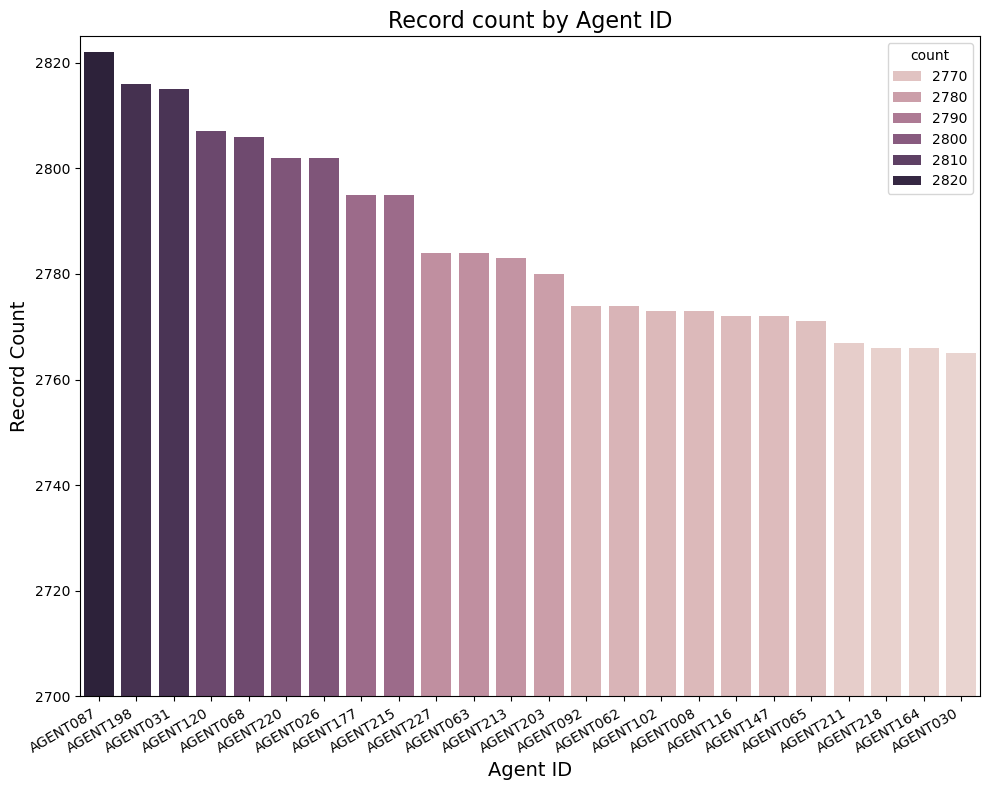

In [17]:
# Sets figure size to cover more of screen
plt.figure(figsize=(10, 8))

# Sets palette for plot using seaborn's pastel6 palette
# sns.set_palette("pastel6")

# Creates barplot showing top 25 agents that had the most record counts in dataset 
# sets color based on count value
sns.barplot(data=agent_record_counts[0:24], x='Agent ID', y='count', hue='count')

# Assigns title to plot
plt.title('Record count by Agent ID', fontsize=16)

# Displays label on X axis
plt.xlabel('Agent ID', fontsize=14)
# Displays label on Y axis
plt.ylabel('Record Count', fontsize=14)
# Sets x axis tick marks to display rotated at a 30 degree angle 
# and sets labels to align with correct bars
plt.xticks(rotation=30, ha='right')
# Sets Y axis to between 2700 and 2875 to allow better view 
plt.ylim(2700, 2825)

# Tightens up display of graph
plt.tight_layout()
# Shows graph without method description displaying
plt.show()

##### Graph 3
This graph shows the top 25 agents that were transferred the most calls from the IVR.  

In [19]:
agent_connect = IVR_data[IVR_data['Topic'] == 'Connect to Agent']
# Assigns agent_connect_counts variable to store a dataframe of the counts of records that had 'Connect to Agent' as the topic
agent_connect_counts = agent_connect.groupby('Agent ID')['Topic'].value_counts().reset_index().sort_values(by='count', ascending=False)
# Displays dataframe stored in variable
agent_connect_counts

,Agent ID,Topic,count
214,AGENT215,Connect to Agent,347
167,AGENT168,Connect to Agent,343
56,AGENT057,Connect to Agent,339
97,AGENT098,Connect to Agent,336
187,AGENT188,Connect to Agent,335
...,...,...,...
38,AGENT039,Connect to Agent,263
174,AGENT175,Connect to Agent,257
144,AGENT145,Connect to Agent,256
121,AGENT122,Connect to Agent,250


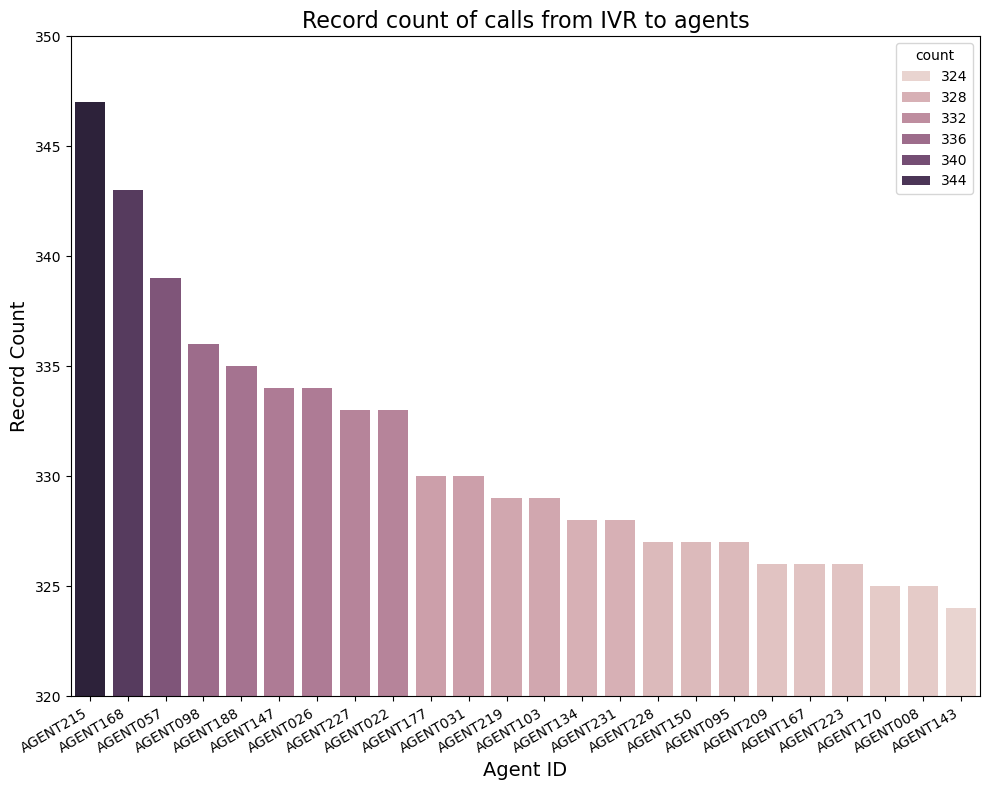

In [20]:
# Sets figure size to cover more of screen
plt.figure(figsize=(10, 8))

# Sets palette for plot using seaborn's icefire palette
# sns.set_palette("icefire", 10, 0.5)

# Creates barplot showing top 25 agents that had the most record counts with the 'Connect to Agent' topic
# sets color based on count value
sns.barplot(data=agent_connect_counts[0:24], x='Agent ID', y='count', hue='count')

# Assigns title to plot
plt.title('Record count of calls from IVR to agents', fontsize=16)

# Displays label on X axis
plt.xlabel('Agent ID', fontsize=14)
# Displays label on Y axis
plt.ylabel('Record Count', fontsize=14)
# Sets x axis tick marks to display rotated at a 30 degree angle 
# and sets labels to align with correct bars
plt.xticks(rotation=30, ha='right')
# Sets Y axis to between 320 and 350 to allow better view 
plt.ylim(320, 350)

# Tightens up display of graph
plt.tight_layout()
# Shows graph without method description displaying
plt.show()

##### Graph 4
This graph shows the count of records for duration spent in the IVR grouped by each 100 seconds.  The legend shows that different colors are used for each IVR duration group.  We can see that the calls seem to be normally distributed with less calls to the IVR lasting in the 100 or 600 second range.  The distribution slightly skews negative with the most records for each topic showing to last in the 400 second range. This aligns with the data we explored earlier using the .describe() method. There does not appear to be any specific topic that is distributed differently than the others.

In [22]:
# IVR_data.groupby('Topic')['Call Duration'].value_counts()

In [23]:
# Assigns IVR_duration_counts variable to store a dataframe of the counts of duration grouped by Topic from the IVR data file
IVR_duration_counts = IVR_data.groupby('Topic')['Call Duration'].value_counts().reset_index(name = 'Record Count')
# Displays dataframe stored in variable
# IVR_duration_counts

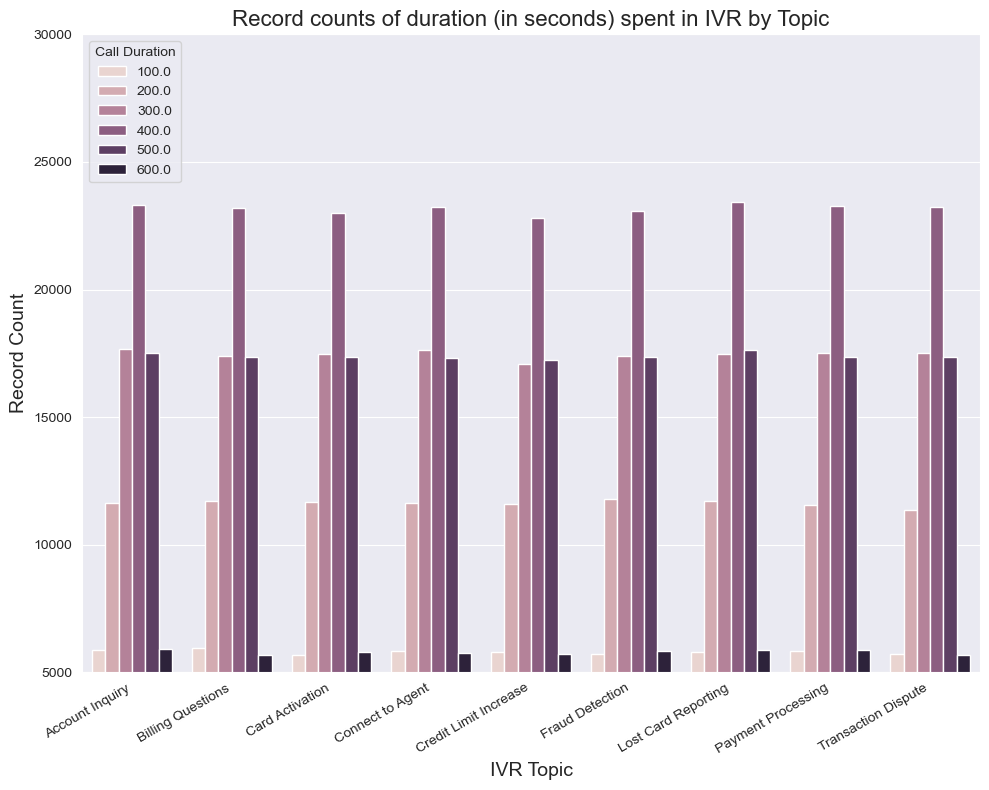

In [24]:
# Sets figure size to cover more of screen
plt.figure(figsize=(10, 8))

# Sets palette for plot using seaborn's flare palette
# sns.set_palette("flare")

# Sets background style for plot using seaborn's darkgrid style
sns.set_style("darkgrid")

# Creates barplot showing record counts of duration groups in dataset by Topic
# sets color hue based on duration 
sns.barplot(data=IVR_duration_counts, x='Topic', y='Record Count', hue='Call Duration')

# Assigns title to plot
plt.title('Record counts of duration (in seconds) spent in IVR by Topic', fontsize=16)

# Displays label on X axis
plt.xlabel('IVR Topic', fontsize=14)

# Displays label on Y axis
plt.ylabel('Record Count', fontsize=14)

# Sets x axis tick marks to display rotated at a 30 degree angle 
# and sets labels to align with correct bars
plt.xticks(rotation=30, ha='right')

# Sets Y axis to between 5000 and 30000 to allow better view 
plt.ylim(5000, 30000)

# Tightens up display of graph
plt.tight_layout()

# Displays legend for color coded IVR duration in seconds n the upper left corner of graph
plt.legend(title='Call Duration', loc='upper left')

# Shows graph without method description displaying
plt.show()

#### 4. Conclusion

##### Based on the exploration of data above (and below), I can see that I need to clean up the Caller ID field to have a cleaner display of phone numbers and also to see if removing the extensions gives us more records connecting the same phone numbers calling in.  I can also see that the differences in the fictious data are so small in a real-life sense, but there are still differences so I believe this dataset will still work throughout the project.  As this project progresses, I also plan to remove records with missing values (or populate a value when missing).   

##### Additional graphs and data exploration for project continuation

In [28]:
# Assigns IVR_topic_counts variable to store a dataframe of the record counts by Topic from the IVR data file
IVR_topic_counts = IVR_data['Topic'].value_counts().reset_index()
# Displays dataframe
IVR_topic_counts

,Topic,count
0,Account Inquiry,84053
1,Lost Card Reporting,83956
2,Payment Processing,83558
3,Connect to Agent,83393
4,Billing Questions,83354
5,Fraud Detection,83325
6,Card Activation,83157
7,Transaction Dispute,82913
8,Credit Limit Increase,82291


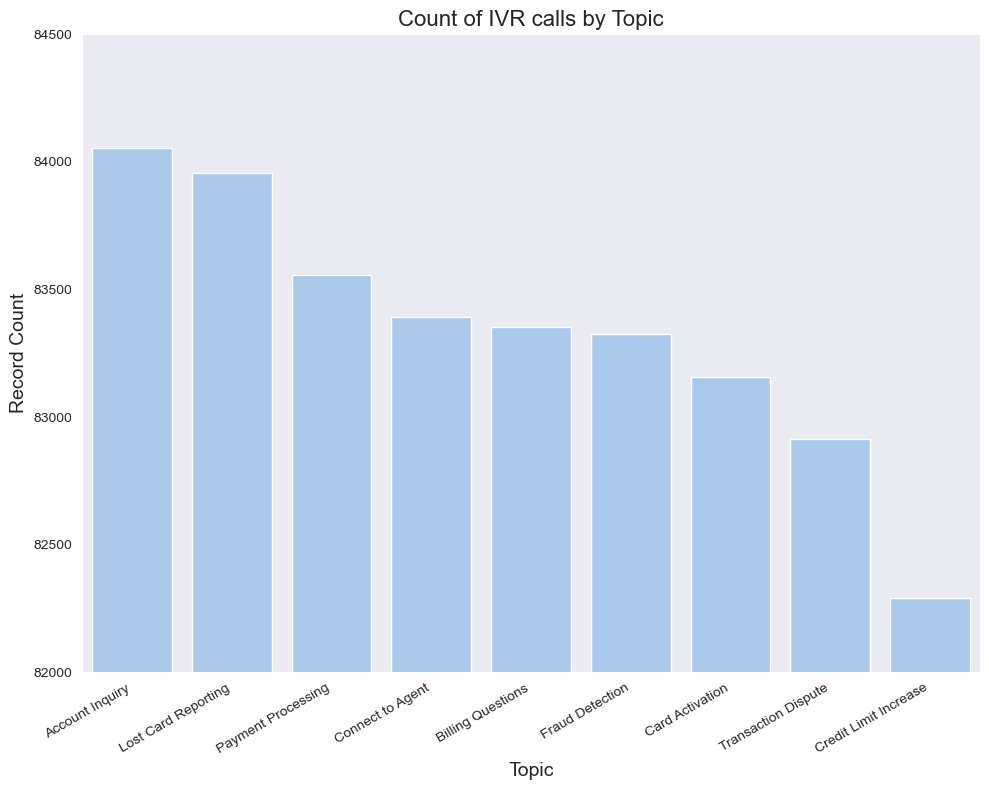

In [29]:
# Sets figure size to cover more of screen
plt.figure(figsize=(10, 8))

# Sets palette for plots using seaborn's pastel palette
sns.set_palette("pastel")

# Creates barplot showing total record counts of each topic in IVR dataset
sns.barplot(data=IVR_topic_counts, x='Topic', y='count')

# Assigns title to plot
plt.title('Count of IVR calls by Topic', fontsize=16)

# Displays label on X axis
plt.xlabel('Topic', fontsize=14)

# Displays label on Y axis
plt.ylabel('Record Count', fontsize=14)

# Sets x axis tick marks to display rotated at a 30 degree angle 
# and sets labels to align with correct bars
plt.xticks(rotation=30, ha='right')

# Shows grid lines on Y axis
plt.grid(axis='y')

# Sets Y axis to between 82000 and 84500 records to allow better view 
plt.ylim(82000, 84500)

# Tightens up display of graph
plt.tight_layout()

# Shows graph without method description displaying
plt.show()

In [30]:
# Assigns unique_phone_number variable to store a dataframe of the unique phone numbers
unique_phone_number = pd.DataFrame(IVR_data['Caller ID'].unique())
# Displays dataframe stored in variable
unique_phone_number
# There are currently 338,848 unique phone numbers
# Will transform Caller ID values to remove extensions and prefixes to get to 10 digit format and see if the unique phone numbers are less 

,0
0,001-457-380-0182x4265
1,599.667.1264x0627
2,271-992-2369x2744
3,001-271-236-7042x88602
4,(690)717-4084x310
...,...
338843,+1-494-596-0878x57143
338844,+1-977-520-4006x153
338845,724-212-1845x195
338846,222.448.4257


In [31]:
# Assigns call_frequency_count variable to store the record count grouped by each Caller ID (unique phone numbers and call count)
call_frequency_count = pd.DataFrame(IVR_data.groupby('Caller ID')['Caller ID'].value_counts().sort_values(ascending=False))
# Displays results stored in variable
# call_frequency_count[0:24]
call_frequency_count

,count
Caller ID,
8064719069,12
+1-504-845-3512x47448,11
5233657460,11
987-609-3543x1958,11
(318)278-4676x6427,11
...,...
001-892-583-9222,1
001-892-607-2385,1
001-892-621-3168x22059,1


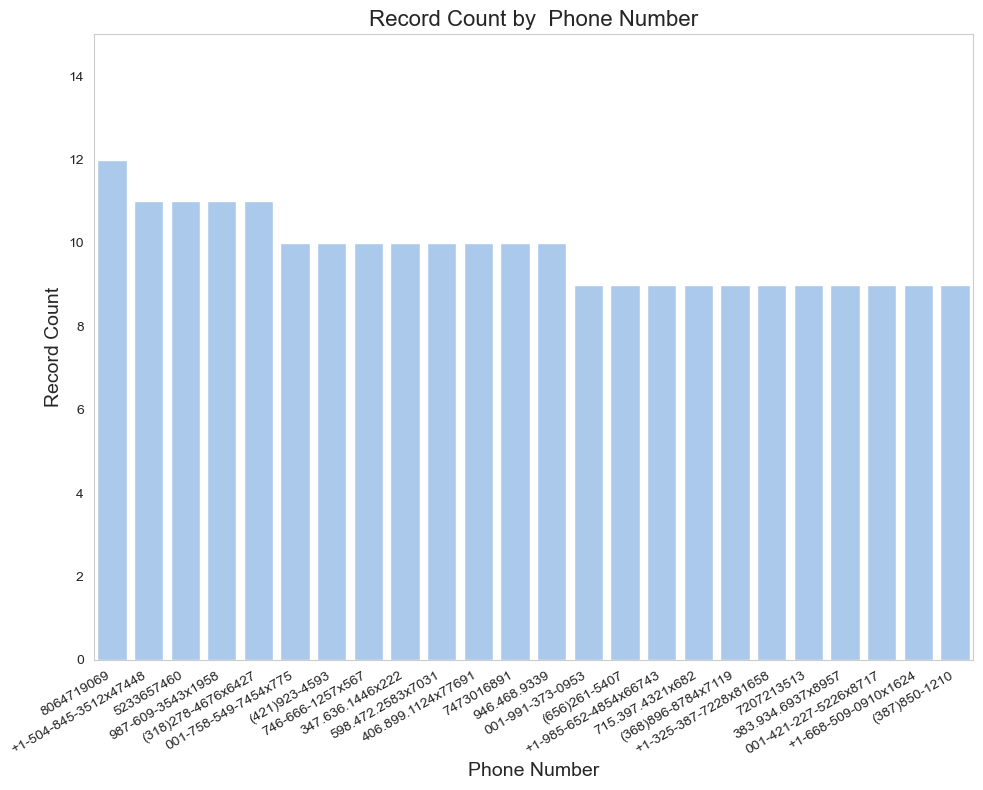

In [32]:
# Sets figure size to cover more of screen
plt.figure(figsize=(10, 8))

# Sets background style using seaborn's whitegrid style
sns.set_style("whitegrid")

# Creates barplot showing total record counts of each phone number in IVR dataset for top 25 phone numbers
sns.barplot(data=call_frequency_count[0:24], x='Caller ID', y='count')

# Assigns title to plot
plt.title('Record Count by  Phone Number', fontsize=16)

# Displays label on X axis
plt.xlabel('Phone Number', fontsize=14)

# Displays label on Y axis
plt.ylabel('Record Count', fontsize=14)

# Sets x axis tick marks to display rotated at a 30 degree angle 
# and sets labels to align with correct bars
plt.xticks(rotation=30, ha='right')

# Shows grid lines on Y axis
plt.grid(axis='y')

# Sets Y axis to between 0 and 15 for record count to allow better view 
plt.ylim(0, 15)

# Tightens up display of graph
plt.tight_layout()

# Shows graph without method description displaying
plt.show()

Text(0.5, 1.0, 'Topics: % to Total')

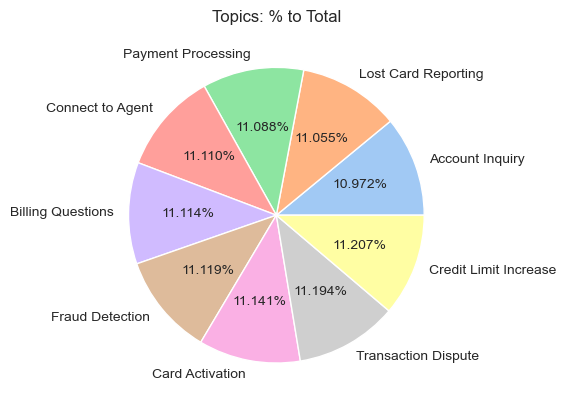

In [33]:
# Assigns IVR_topic_counts variable to store record counts of each topic
IVR_topic_counts = IVR_data['Topic'].value_counts()
# Assigns topic_names variable to store each topic's names
topic_names = IVR_topic_counts.index
# Assigns topic_values variable to store record counts of each topic and sorts it by value
topic_values = sorted(IVR_topic_counts.values)
# Plots pie chart of topic names and values in % to total format - shows at 3 decimal places to see more variation in percentages
plt.pie(topic_values, labels=topic_names, autopct='%1.3f%%')
# displays title for pie chart
plt.title('Topics: % to Total')
# shows Account Inquiry as the least popular IVR topic and Credit Limit Increase as the most frequently used

In [34]:
# Assigns agent_topic_counts variable to store a dataframe of the counts of each topic grouped by Agent ID from the IVR data file
agent_topic_counts = IVR_data.groupby('Agent ID')['Topic'].value_counts().reset_index()
# Displays dataframe stored in variable
agent_topic_counts

,Agent ID,Topic,count
0,AGENT001,Connect to Agent,313
1,AGENT001,Account Inquiry,300
2,AGENT001,Payment Processing,300
3,AGENT001,Fraud Detection,294
4,AGENT001,Credit Limit Increase,291
...,...,...,...
2245,AGENT250,Account Inquiry,299
2246,AGENT250,Connect to Agent,299
2247,AGENT250,Transaction Dispute,298
2248,AGENT250,Card Activation,278


### 8.2 Term Project: Term Project Milestone 2: Data Preparation

##### I could not locate an existing dataset for this idea, so I appended additional data to the original dataset to try to better simulate a real dataset of call record details.  After cleanig the data, I explored the combined dataset similar to the exploration in Milestone 1.

In [37]:
# Assigns IVR_data2 variable to dataset from fraud credit card callers into IVR dataset
IVR_data2 = pd.read_csv('ivrfraud_dataset.csv')

In [38]:
# Added new data into original dataset to make it more usable for project
# Assigns call_data variable to store combined datasets to use for project
call_data = pd.concat([IVR_data, IVR_data2], ignore_index=True)
# Displays first and last few records of dataset
call_data

,Call ID,Caller ID,Account Number,Agent ID,Timestamp,Call Duration,Call Transcript,Sentiment Score,Topic
0,1,001-457-380-0182x4265,NaN,AGENT205,2024-10-20T18:18:21.279734,NaN,Can you guide me through the activation process?,-0.085963,Card Activation
1,2,599.667.1264x0627,ACC000481,AGENT144,2024-10-20T18:20:44.279734,400.0,How do I report my card as lost?,-0.625687,Lost Card Reporting
2,3,271-992-2369x2744,ACC000954,AGENT101,2024-10-20T18:25:37.279734,500.0,What do I need to qualify for a limit increase?,0.384147,Credit Limit Increase
3,4,001-271-236-7042x88602,ACC000331,AGENT043,2024-10-28T13:22:21.279734,500.0,Can you block my lost card immediately?,-0.538936,Lost Card Reporting
4,5,(690)717-4084x310,ACC000622,AGENT139,2024-10-09T08:48:21.279734,300.0,I see a charge I didn't authorize.,0.993353,Transaction Dispute
...,...,...,...,...,...,...,...,...,...
1499995,f0d5f853-794a-4957-910f-ae0b9de3e1e0,001-882-284-4936,528,AGT0133,2024-07-13 11:03:08.138481,599.0,How do I activate my new card?,-0.930000,Card Activation
1499996,c08662c1-32ac-4ccf-82c6-73b25487f732,(400)719-3172,964,AGT0086,2024-08-07 14:16:47.495714,411.0,What is my current credit limit?,0.620000,Balance Inquiry
1499997,c3635794-ed37-4990-9b1d-dd5a6febb993,420-884-9743,957,AGT0175,2024-04-12 22:43:17.303723,281.0,What is my due date for this month?,-0.120000,Payment Processing
1499998,437cc4a2-118e-4d32-a825-1fd3345ce900,6194029035,29,AGT0206,2024-04-18 00:44:23.899426,261.0,What is my current credit limit?,NaN,Balance Inquiry


In [39]:
# Returns statistical data about the numeric columns in the dataset
call_data.describe()

,Call Duration,Sentiment Score
count,1.461159e+06,1.265874e+06
mean,3.570206e+02,-1.871883e-02
std,1.396603e+02,5.759983e-01
min,1.000000e+02,-1.000000e+00
25%,2.430000e+02,-5.300000e-01
50%,3.850000e+02,-4.000000e-02
75%,4.930000e+02,4.907821e-01
max,6.000000e+02,1.000000e+00


In [40]:
# Displays the summary of the dataset and information about the record counts, data types and indexes
call_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500000 entries, 0 to 1499999
Data columns (total 9 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Call ID          1500000 non-null  object 
 1   Caller ID        1500000 non-null  object 
 2   Account Number   1481159 non-null  object 
 3   Agent ID         1350663 non-null  object 
 4   Timestamp        1500000 non-null  object 
 5   Call Duration    1461159 non-null  float64
 6   Call Transcript  1388158 non-null  object 
 7   Sentiment Score  1265874 non-null  float64
 8   Topic            1500000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 103.0+ MB


##### I began cleaned the combined dataset by extracting the phone number (from the Caller ID column) in a usable format to review and compare frequency of calls 

In [42]:
# Import package to use functions to search for regular expression patterns in strings (search, etc.)
import re

In [43]:
# Created a function that will remove all unnecessary characters and numbers from Caller ID 
# to extract numbers in format of 10-digit US-based phone numbers
def clean_phone_number(phone_number):
    # Searches for regular expression pattern similar to format of 10-digit US-based phone numbers
    # any characters (or none), then 3 numbers, any characters (or none), 3 numbers, any characters (or none), and then 4 numbers
    phone_number = re.search(r'(\D*(\d{3})\D*(\d{3})\D*(\d{4}))', phone_number )
    # If the pattern search did not match a pattern then return a missing value for this field
    if phone_number == None:
        return None
    # If the pattern is matched then return the 10-digit phone number that was found 
    return phone_number.group(2)+phone_number.group(3)+phone_number.group(4)

In [44]:
# Create a column in the combined dataset named Phone_Number which stores the numbers found when searching for the phone number pattern
call_data['Phone_Number'] = call_data['Caller ID'].apply(clean_phone_number)

##### I replaced any characters (non-number values) in the Account Number column with an empty string, so that only numbers were left.  Then I filled in any missing values with 0 as the Account Number and changed the type of column to hold integer values.

In [46]:
# Replaced any characters in the Account Number column with an empty string 
call_data['Account Number'] = call_data['Account Number'].replace(r'\D', '', regex=True)

In [47]:
# Displays first and last few values of designated column to show that characters were removed
call_data['Account Number']

0             NaN
1          000481
2          000954
3          000331
4          000622
            ...  
1499995       528
1499996       964
1499997       957
1499998        29
1499999       703
Name: Account Number, Length: 1500000, dtype: object

In [48]:
# Fills the missing values in designated column with 0
call_data['Account Number'] = call_data['Account Number'].fillna(0)

In [49]:
# Changes data type of column to integer
call_data['Account Number'] = call_data['Account Number'].astype(int)

In [50]:
# Displays first and last few values of designated column to show that column values are now formatted as integers
call_data['Account Number']

0            0
1          481
2          954
3          331
4          622
          ... 
1499995    528
1499996    964
1499997    957
1499998     29
1499999    703
Name: Account Number, Length: 1500000, dtype: int64

##### I replaced any characters (non-number values) in the Agent ID column with an empty string, so that only numbers were left.  Then I filled in any missing values with 0 as the Agent ID and changed the type of column to hold integer values.

In [52]:
# Replaced any characters in the Agent ID column with an empty string 
call_data['Agent ID'] = call_data['Agent ID'].replace(r'\D', '', regex=True)

In [53]:
# Displays first and last few values of designated column to show that characters were removed
call_data['Agent ID']

0           205
1           144
2           101
3           043
4           139
           ... 
1499995    0133
1499996    0086
1499997    0175
1499998    0206
1499999    0177
Name: Agent ID, Length: 1500000, dtype: object

In [54]:
# Fills the missing values in designated column with 0
call_data['Agent ID'] = call_data['Agent ID'].fillna(0)

In [55]:
# Changes data type of column to integer
call_data['Agent ID'] = call_data['Agent ID'].astype(int)

In [56]:
# Displays first and last few values of designated column to show that column values are now formatted as integers
call_data['Agent ID']

0          205
1          144
2          101
3           43
4          139
          ... 
1499995    133
1499996     86
1499997    175
1499998    206
1499999    177
Name: Agent ID, Length: 1500000, dtype: int64

##### I changed the data type for the Timestamp column from an object to a date/time format.  I also created 3 additional columns in the dataset to hold the date of the call in year-month-day format, the name of the day of the week of the call, and the number of the day during the week (Monday starts as 0 and Sunday ends with 6).

In [58]:
# Changed data type from object to date/timestamp
call_data['Timestamp'] = pd.to_datetime(call_data['Timestamp'], format='mixed')

In [59]:
# Created 'Call Date' column to hold date of call in year-month-day format without the time
call_data['Call Date'] = call_data['Timestamp'].dt.strftime('%Y-%m-%d')

In [60]:
# Created 'Day_Name' column to hold the day of call
call_data['Day_Name'] = call_data['Timestamp'].dt.day_name()

In [61]:
# Created 'DayOfWeek_Number' column to hold the number of day in the week (Starts on Monday as 0 and ends with Sunday as 6)
call_data['DayOfWeek_Number'] = call_data['Timestamp'].dt.dayofweek

##### I replaced any missing values in the Call Transcript column with 'No Transcript' as the value.  Then I created a column to group the call duration into groups of hundreds by rounding the value in the 'Call Duration' column to the nearest hundred.  fI checked to see if any columns still had missing values and decided to remove the records in those columns since they do not seem useful for creating a model (I may eliminate those columns before proceeding with next project milestone).  

In [63]:
# Filled in any missing values in the 'Call Transcript' column with 'No Transcript' as the value
call_data['Call Transcript'] = call_data['Call Transcript'].fillna('No Transcript')

In [64]:
# Created new column called 'Call Duration Group' which is the value in the 'Call Duration' column rounded to the nearest hundred
call_data['Call Duration Group'] = round(call_data['Call Duration']/100)*100

In [65]:
# Displays shape of call_data before any rows(records) are dropped (1,500,000 rows and 10 columns) 
call_data.shape

(1500000, 14)

In [66]:
# Displays number of missing values in each column in dataset
call_data.isnull().sum()

Call ID                     0
Caller ID                   0
Account Number              0
Agent ID                    0
Timestamp                   0
Call Duration           38841
Call Transcript             0
Sentiment Score        234126
Topic                       0
Phone_Number                0
Call Date                   0
Day_Name                    0
DayOfWeek_Number            0
Call Duration Group     38841
dtype: int64

In [67]:
# Assigns clean_call_data variable to dataframe of call_data after dropping any rows that have any missing values in the designated columns
clean_call_data = call_data.dropna(subset=['Call Duration', 'Sentiment Score', 'Call Duration Group'])
# clean_call_data

In [68]:
# Displays number of missing values in each column in dataset
clean_call_data.isnull().sum()

Call ID                0
Caller ID              0
Account Number         0
Agent ID               0
Timestamp              0
Call Duration          0
Call Transcript        0
Sentiment Score        0
Topic                  0
Phone_Number           0
Call Date              0
Day_Name               0
DayOfWeek_Number       0
Call Duration Group    0
dtype: int64

In [69]:
# Displays shape of clean_call_data after rows(records) were dropped for missing call duration and columns were added (1,232,848 rows and 14 columns) 
clean_call_data.shape

(1232848, 14)

##### I selected the columns from the clean_call_data dataframe that I think I may use in to create a predictive model.  I do not think the following columns hold any predictive value and will not include them in the clean_call_data dataset: Call ID, Caller ID, and Call Duration. I extracted and/or transformed the data that I needed from these columns already.  I might further refine the dataset to reduce columns (such as call transcript) depending on future project steps.  

In [71]:
# Selects only certain columns from clean_call_data dataframe and aassigns it to clean_call_data variable 
# (effectively replacing the original clean_call_data dataframe which had 14 columns)
clean_call_data = clean_call_data[['Account Number', 'Agent ID', 'Timestamp', 'Call Duration Group', 'Call Transcript', 'Sentiment Score', 'Topic', 'Phone_Number', 'Call Date', 'Day_Name', 'DayOfWeek_Number']]
# Displays first few and last records of dataset
clean_call_data 

,Account Number,Agent ID,Timestamp,Call Duration Group,Call Transcript,Sentiment Score,Topic,Phone_Number,Call Date,Day_Name,DayOfWeek_Number
1,481,144,2024-10-20 18:20:44.279734,400.0,How do I report my card as lost?,-0.625687,Lost Card Reporting,5996671264,2024-10-20,Sunday,6
2,954,101,2024-10-20 18:25:37.279734,500.0,What do I need to qualify for a limit increase?,0.384147,Credit Limit Increase,2719922369,2024-10-20,Sunday,6
3,331,43,2024-10-28 13:22:21.279734,500.0,Can you block my lost card immediately?,-0.538936,Lost Card Reporting,2712367042,2024-10-28,Monday,0
4,622,139,2024-10-09 08:48:21.279734,300.0,I see a charge I didn't authorize.,0.993353,Transaction Dispute,6907174084,2024-10-09,Wednesday,2
5,832,0,2024-10-29 09:53:21.279734,300.0,"I lost my credit card, what should I do?",-0.736872,Lost Card Reporting,4037985911,2024-10-29,Tuesday,1
...,...,...,...,...,...,...,...,...,...,...,...
1499994,857,188,2024-04-04 04:07:21.394677,200.0,What is my current credit limit?,0.570000,Balance Inquiry,6207588089,2024-04-04,Thursday,3
1499995,528,133,2024-07-13 11:03:08.138481,600.0,How do I activate my new card?,-0.930000,Card Activation,8822844936,2024-07-13,Saturday,5
1499996,964,86,2024-08-07 14:16:47.495714,400.0,What is my current credit limit?,0.620000,Balance Inquiry,4007193172,2024-08-07,Wednesday,2
1499997,957,175,2024-04-12 22:43:17.303723,300.0,What is my due date for this month?,-0.120000,Payment Processing,4208849743,2024-04-12,Friday,4


In [72]:
# Displays shape of clean_call_data after selecting certain columns to possibly use for precitive model creation (1,232,848 rows and 11 columns) 
clean_call_data.shape

(1232848, 11)

##### Additional graphs similar to original dataset but using clean combined dataset to get a visual of different data slices and aspects for model creation.  Some observations that may need further review or yield some variation in results or aid in predicting fraud bots are the amount of calls that get connected to Agent ID 215 (visually higher than other agents), the Call Duration Group of 200 seconds and lower AHT for the IVR for Topics of Balance Inquiry and Rewards Inquiry (do not seem as normally and evenly distributed as other topics).

In [74]:
# Determines the average duration spent in IVR rounded to nearest hundred based on assigned IVR Topic
# Also sorts values descending to show highest to lowest average IVR time and stores results in avg_duration variable
avg_duration_group = clean_call_data.groupby('Topic')['Call Duration Group'].agg('mean').sort_values(ascending=False)
avg_duration_group

Topic
Lost Card Reporting      364.480985
Transaction Dispute      364.397616
Account Inquiry          363.874922
Credit Limit Increase    363.764884
Connect to Agent         363.751701
Billing Questions        363.038073
Card Activation          356.848419
Fraud Detection          354.842512
Payment Processing       353.905503
Rewards Inquiry          350.064190
Balance Inquiry          349.894799
Name: Call Duration Group, dtype: float64

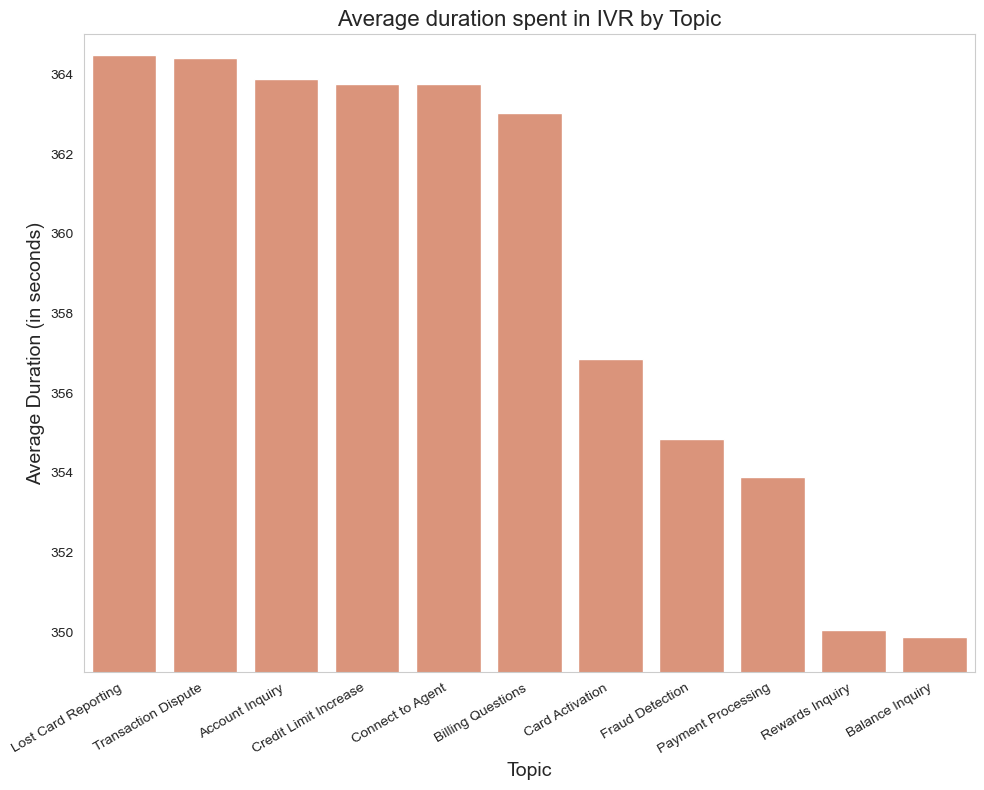

In [75]:
# Sets figure size to cover more of screen
plt.figure(figsize=(10, 8))

# Sets palette for plots using seaborn's flare palette
sns.set_palette("flare")

# Creates barplot showing average duration in seconds spent in IVR by topic
sns.barplot(avg_duration_group)

# Assigns title to plot
plt.title('Average duration spent in IVR by Topic', fontsize=16)

# Displays label on X axis
plt.xlabel('Topic', fontsize=14)

# Displays label on Y axis
plt.ylabel('Average Duration (in seconds)', fontsize=14)

# Sets x axis tick marks to display rotated at a 30 degree angle 
# and sets labels to align with correct bars
plt.xticks(rotation=30, ha='right')

# Shows grid lines on Y axis
plt.grid(axis='y')

# Sets Y axis to between 349 and 365 seconds to allow better view 
plt.ylim(349, 365)

# Tightens up display of graph
plt.tight_layout()

# Shows graph without method description displaying
plt.show()

In [76]:
# Assigns agent_record_counts variable to store a dataframe of the counts grouped by Agent ID from the IVR data file
agent_record_counts = clean_call_data.groupby('Agent ID')['Agent ID'].value_counts().reset_index().sort_values(by='count', ascending=False)
# Displays dataframe stored in variable
agent_record_counts

,Agent ID,count
0,0,122816
188,188,4159
102,102,4156
107,107,4152
52,52,4142
...,...,...
264,264,2043
260,260,2043
273,273,2042
299,299,2011


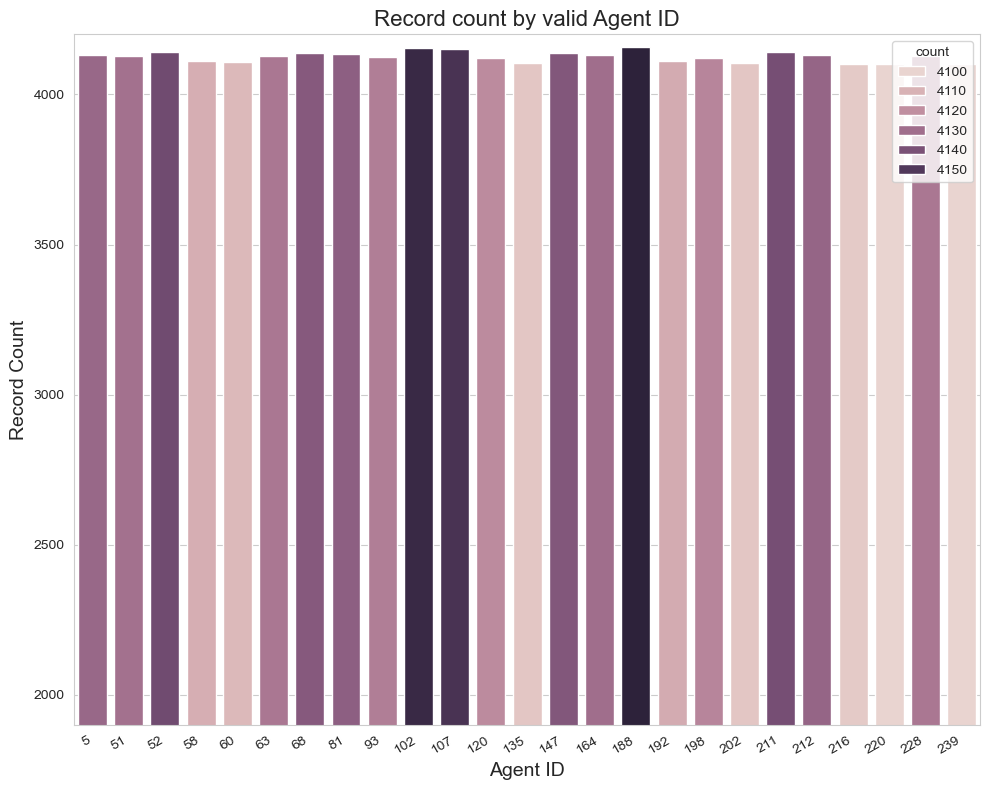

In [77]:
# Sets figure size to cover more of screen
plt.figure(figsize=(10, 8))

# Creates barplot showing top 25 agents that had the most record counts in dataset 
# sets color based on count value
sns.barplot(data=agent_record_counts.iloc[1:26], x='Agent ID', y='count', hue='count')

# Assigns title to plot
plt.title('Record count by valid Agent ID', fontsize=16)

# Displays label on X axis
plt.xlabel('Agent ID', fontsize=14)
# Displays label on Y axis
plt.ylabel('Record Count', fontsize=14)
# Sets x axis tick marks to display rotated at a 30 degree angle 
# and sets labels to align with correct bars
plt.xticks(rotation=30, ha='right')
# Sets Y axis to between 1900 and 4200 to allow better view 
plt.ylim(1900, 4200)

# Tightens up display of graph
plt.tight_layout()
# Shows graph without method description displaying
plt.show()

In [78]:
agent_connect = clean_call_data[clean_call_data['Topic'] == 'Connect to Agent']
# Assigns agent_connect_counts variable to store a dataframe of the counts of records that had 'Connect to Agent' as the topic
agent_connect_counts = agent_connect.groupby('Agent ID')['Topic'].value_counts().reset_index().sort_values(by='count', ascending=False)
# Displays dataframe stored in variable
agent_connect_counts

,Agent ID,Topic,count
0,0,Connect to Agent,5889
215,215,Connect to Agent,255
147,147,Connect to Agent,248
168,168,Connect to Agent,246
98,98,Connect to Agent,244
...,...,...,...
23,23,Connect to Agent,181
142,142,Connect to Agent,181
39,39,Connect to Agent,178
122,122,Connect to Agent,174


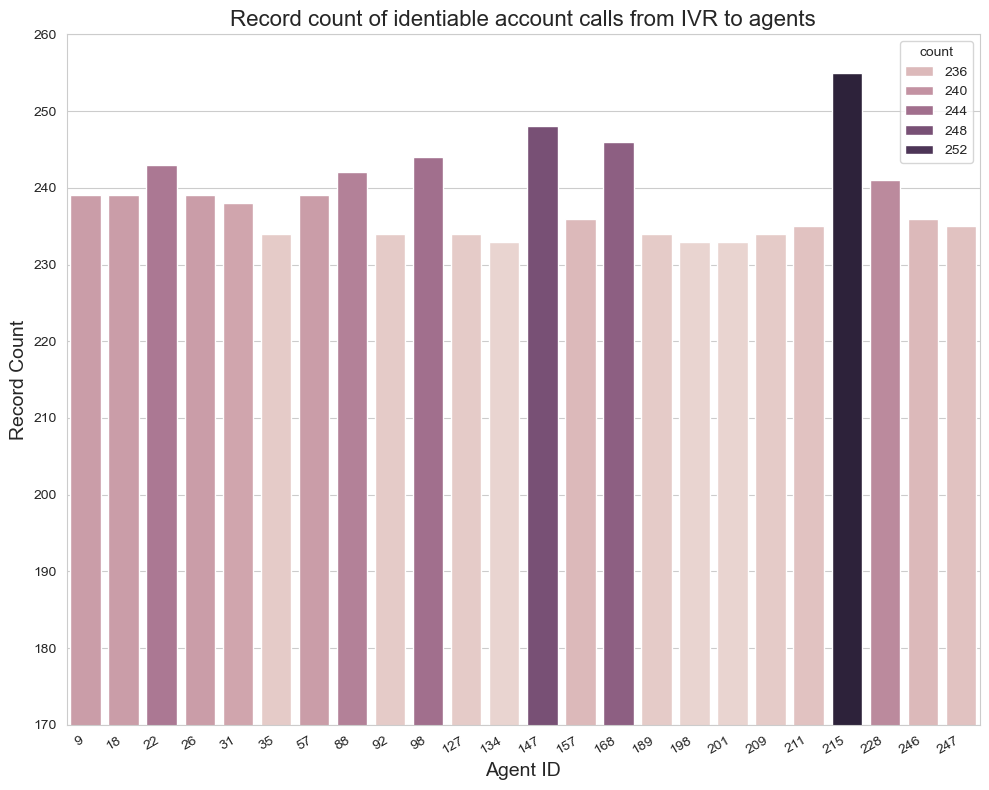

In [79]:
# Sets figure size to cover more of screen
plt.figure(figsize=(10, 8))

# Creates barplot showing top 25 agents that had the most record counts with the 'Connect to Agent' topic
# sets color based on count value
sns.barplot(data=agent_connect_counts[1:25], x='Agent ID', y='count', hue='count')

# Assigns title to plot
plt.title('Record count of identiable account calls from IVR to agents', fontsize=16)

# Displays label on X axis
plt.xlabel('Agent ID', fontsize=14)
# Displays label on Y axis
plt.ylabel('Record Count', fontsize=14)
# Sets x axis tick marks to display rotated at a 30 degree angle 
# and sets labels to align with correct bars
plt.xticks(rotation=30, ha='right')
# Sets Y axis to between 170 and 260 to allow better view 
plt.ylim(170, 260)

# Tightens up display of graph
plt.tight_layout()
# Shows graph without method description displaying
plt.show()

In [80]:
# Assigns IVR_duration_counts variable to store a dataframe of the counts of duration grouped by Topic from the clean_call_data dataframe
IVR_duration_counts = clean_call_data.groupby('Topic')['Call Duration Group'].value_counts().reset_index(name = 'Record Count')
# Displays dataframe stored in variable
IVR_duration_counts

,Topic,Call Duration Group,Record Count
0,Account Inquiry,400.0,15474
1,Account Inquiry,300.0,11716
2,Account Inquiry,500.0,11632
3,Account Inquiry,200.0,7774
4,Account Inquiry,100.0,3970
...,...,...,...
61,Transaction Dispute,300.0,13675
62,Transaction Dispute,500.0,13605
63,Transaction Dispute,200.0,8856
64,Transaction Dispute,100.0,4493


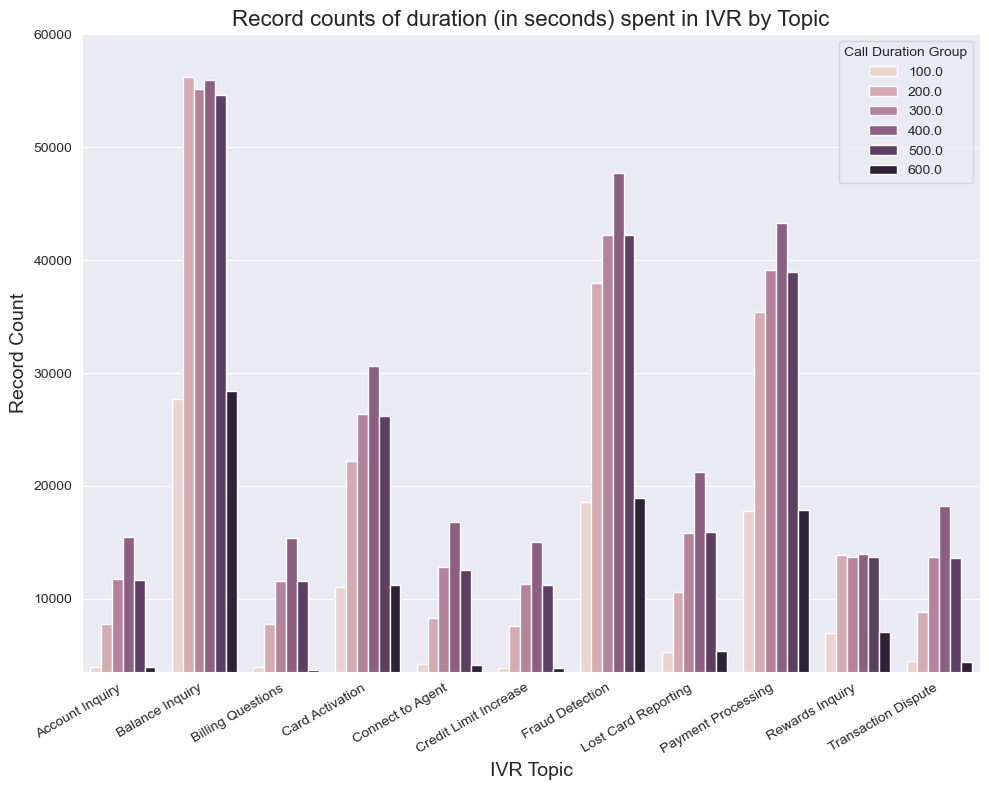

In [81]:
# Sets figure size to cover more of screen
plt.figure(figsize=(10, 8))

# Sets palette for plot using seaborn's flare palette
# sns.set_palette("flare")

# Sets background style for plot using seaborn's darkgrid style
sns.set_style("darkgrid")

# Creates barplot showing record counts of duration groups in dataset by Topic
# sets color hue based on duration 
sns.barplot(data=IVR_duration_counts, x='Topic', y='Record Count', hue='Call Duration Group')

# Assigns title to plot
plt.title('Record counts of duration (in seconds) spent in IVR by Topic', fontsize=16)

# Displays label on X axis
plt.xlabel('IVR Topic', fontsize=14)

# Displays label on Y axis
plt.ylabel('Record Count', fontsize=14)

# Sets x axis tick marks to display rotated at a 30 degree angle 
# and sets labels to align with correct bars
plt.xticks(rotation=30, ha='right')

# Sets Y axis to between 3500 and 60000 to allow better view 
plt.ylim(3500, 60000)

# Tightens up display of graph
plt.tight_layout()

# Displays legend for color coded IVR duration in seconds in the upper right corner of graph
plt.legend(title='Call Duration Group', loc='upper right')

# Shows graph without method description displaying
plt.show()

In [82]:
# Assigns IVR_topic_counts variable to store a dataframe of the record counts by Topic from the clean_call_data dataset
IVR_topic_counts = clean_call_data['Topic'].value_counts().reset_index()
# Displays dataframe
IVR_topic_counts

,Topic,count
0,Balance Inquiry,278039
1,Fraud Detection,207826
2,Payment Processing,192344
3,Card Activation,127701
4,Lost Card Reporting,74256
5,Rewards Inquiry,69325
6,Transaction Dispute,63257
7,Connect to Agent,58800
8,Account Inquiry,54494
9,Billing Questions,53896


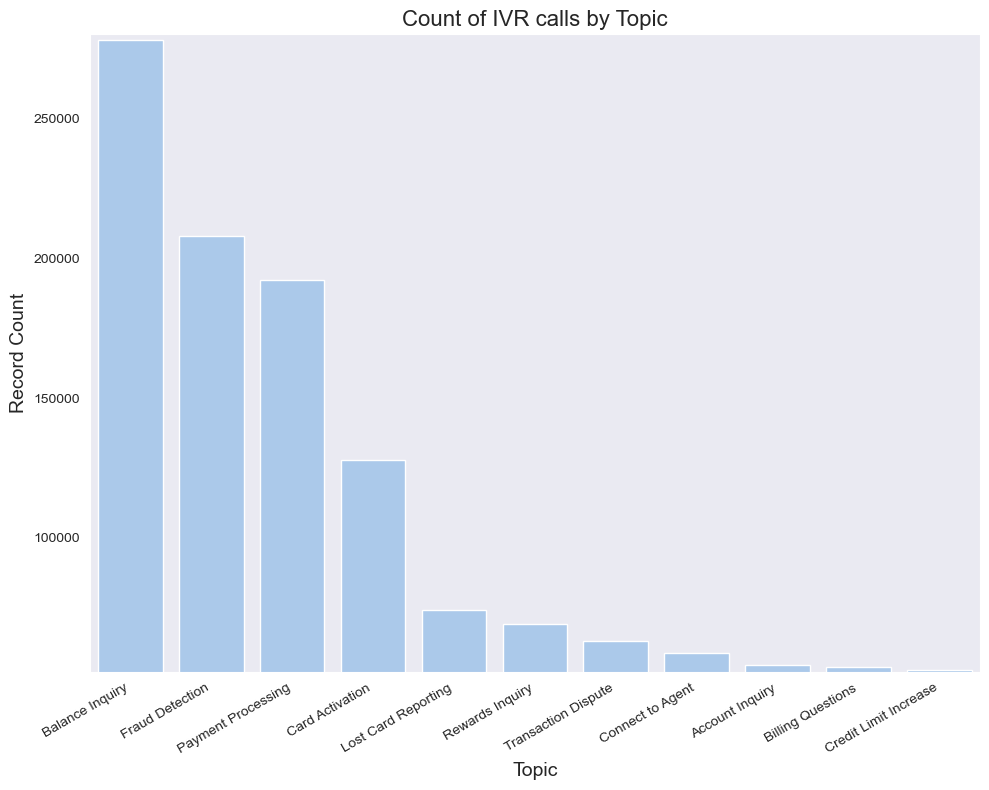

In [83]:
# Sets figure size to cover more of screen
plt.figure(figsize=(10, 8))

# Sets palette for plots using seaborn's pastel palette
sns.set_palette("pastel")

# Creates barplot showing total record counts of each topic in IVR dataset
sns.barplot(data=IVR_topic_counts, x='Topic', y='count')

# Assigns title to plot
plt.title('Count of IVR calls by Topic', fontsize=16)

# Displays label on X axis
plt.xlabel('Topic', fontsize=14)

# Displays label on Y axis
plt.ylabel('Record Count', fontsize=14)

# Sets x axis tick marks to display rotated at a 30 degree angle 
# and sets labels to align with correct bars
plt.xticks(rotation=30, ha='right')

# Shows grid lines on Y axis
plt.grid(axis='y')

# Sets Y axis to between 52000 and 280000 records to allow better view 
plt.ylim(52000, 280000)

# Tightens up display of graph
plt.tight_layout()

# Shows graph without method description displaying
plt.show()

In [84]:
# Assigns unique_phone_number variable to store a dataframe of the unique phone numbers
unique_phone_number = pd.DataFrame(clean_call_data['Phone_Number'].unique())
# Displays dataframe stored in variable
unique_phone_number
# There are currently 988,710 unique phone numbers

,0
0,5996671264
1,2719922369
2,2712367042
3,6907174084
4,4037985911
...,...
988705,6207588089
988706,8822844936
988707,4007193172
988708,4208849743


In [85]:
# Assigns call_frequency_count variable to store the record count grouped by each Phone Number (unique phone numbers and call count)
call_frequency_count = pd.DataFrame(clean_call_data.groupby('Phone_Number')['Phone_Number'].value_counts().sort_values(ascending=False))
# Displays results stored in variable
# call_frequency_count[0:24]
call_frequency_count

,count
Phone_Number,
7466661257,10
2816289202,9
8489657563,9
6297034260,9
4068991124,9
...,...
4895349616,1
4895366743,1
4895411759,1


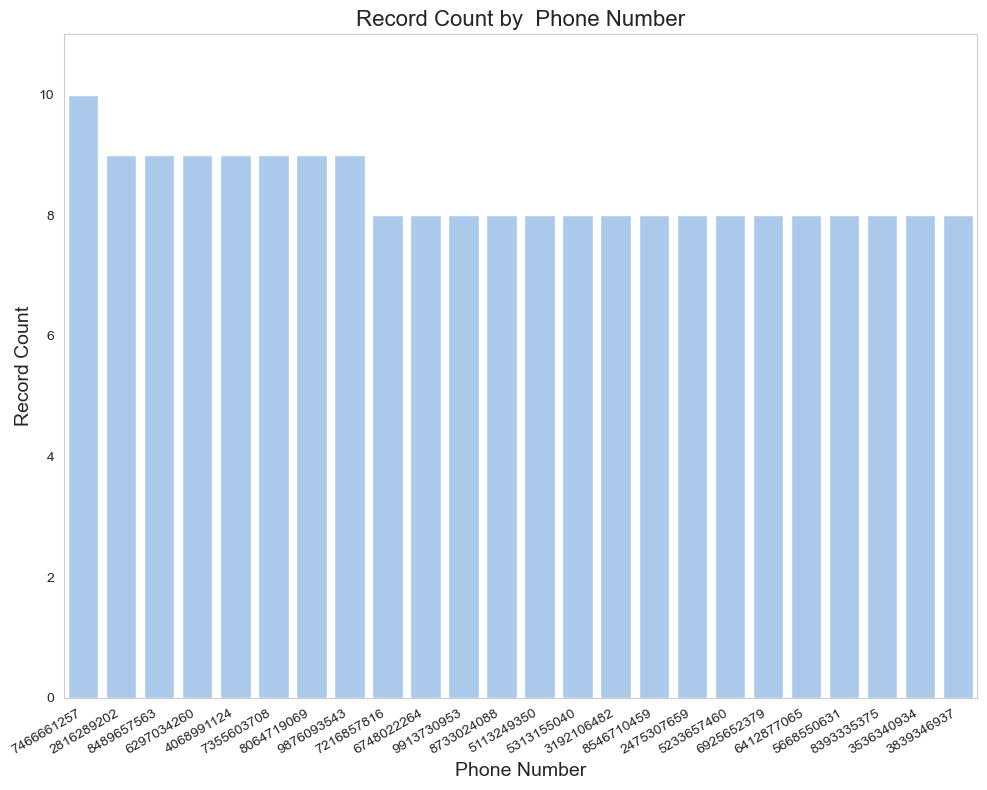

In [86]:
# Sets figure size to cover more of screen
plt.figure(figsize=(10, 8))

# Sets background style using seaborn's whitegrid style
sns.set_style("whitegrid")

# Creates barplot showing total record counts of each phone number in IVR dataset for top 25 phone numbers
sns.barplot(data=call_frequency_count[0:24], x='Phone_Number', y='count')

# Assigns title to plot
plt.title('Record Count by  Phone Number', fontsize=16)

# Displays label on X axis
plt.xlabel('Phone Number', fontsize=14)

# Displays label on Y axis
plt.ylabel('Record Count', fontsize=14)

# Sets x axis tick marks to display rotated at a 30 degree angle 
# and sets labels to align with correct bars
plt.xticks(rotation=30, ha='right')

# Shows grid lines on Y axis
plt.grid(axis='y')

# Sets Y axis to between 0 and 11 for record count to allow better view 
plt.ylim(0, 11)

# Tightens up display of graph
plt.tight_layout()

# Shows graph without method description displaying
plt.show()

Text(0.5, 1.0, 'Topics: % to Total')

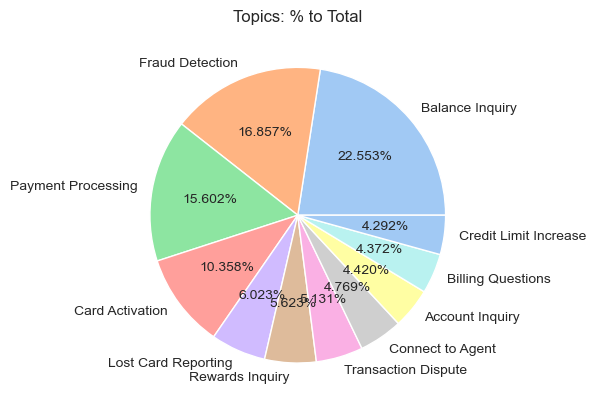

In [87]:
# Assigns IVR_topic_counts variable to store record counts of each topic
IVR_topic_counts = clean_call_data['Topic'].value_counts()
# Assigns topic_names variable to store each topic's names
topic_names = IVR_topic_counts.index
# Assigns topic_values variable to store record counts of each topic and sorts it by value
topic_values = sorted(IVR_topic_counts.values, reverse=True)
# Plots pie chart of topic names and values in % to total format - shows at 3 decimal places to see more variation in percentages
plt.pie(topic_values, labels=topic_names, autopct='%1.3f%%')
# displays title for pie chart
plt.title('Topics: % to Total')
# shows Credit Limit Increase  as the least popular IVR topic and Balance Inquiry as the most frequently used

In [88]:
# Assigns agent_topic_counts variable to store a dataframe of the counts of each topic grouped by Agent ID from the clean_call_data dataset
agent_topic_counts = clean_call_data.groupby('Agent ID')['Topic'].value_counts().reset_index()
# Displays dataframe stored in variable
agent_topic_counts

,Agent ID,Topic,count
0,0,Balance Inquiry,27574
1,0,Fraud Detection,20652
2,0,Payment Processing,19323
3,0,Card Activation,12609
4,0,Lost Card Reporting,7255
...,...,...,...
3006,300,Balance Inquiry,858
3007,300,Fraud Detection,415
3008,300,Payment Processing,411
3009,300,Card Activation,219


In [89]:
clean_call_data

,Account Number,Agent ID,Timestamp,Call Duration Group,Call Transcript,Sentiment Score,Topic,Phone_Number,Call Date,Day_Name,DayOfWeek_Number
1,481,144,2024-10-20 18:20:44.279734,400.0,How do I report my card as lost?,-0.625687,Lost Card Reporting,5996671264,2024-10-20,Sunday,6
2,954,101,2024-10-20 18:25:37.279734,500.0,What do I need to qualify for a limit increase?,0.384147,Credit Limit Increase,2719922369,2024-10-20,Sunday,6
3,331,43,2024-10-28 13:22:21.279734,500.0,Can you block my lost card immediately?,-0.538936,Lost Card Reporting,2712367042,2024-10-28,Monday,0
4,622,139,2024-10-09 08:48:21.279734,300.0,I see a charge I didn't authorize.,0.993353,Transaction Dispute,6907174084,2024-10-09,Wednesday,2
5,832,0,2024-10-29 09:53:21.279734,300.0,"I lost my credit card, what should I do?",-0.736872,Lost Card Reporting,4037985911,2024-10-29,Tuesday,1
...,...,...,...,...,...,...,...,...,...,...,...
1499994,857,188,2024-04-04 04:07:21.394677,200.0,What is my current credit limit?,0.570000,Balance Inquiry,6207588089,2024-04-04,Thursday,3
1499995,528,133,2024-07-13 11:03:08.138481,600.0,How do I activate my new card?,-0.930000,Card Activation,8822844936,2024-07-13,Saturday,5
1499996,964,86,2024-08-07 14:16:47.495714,400.0,What is my current credit limit?,0.620000,Balance Inquiry,4007193172,2024-08-07,Wednesday,2
1499997,957,175,2024-04-12 22:43:17.303723,300.0,What is my due date for this month?,-0.120000,Payment Processing,4208849743,2024-04-12,Friday,4


### 10.2 Term Project: Term Project Milestone 3: Model Building and Evaluation

In [91]:
# 1,232,848 rows and 11 columns in clean_call_data variable from last milestone
# Using this to validate that saved csv file is the same dataset except with 1 additional column (FraudIndicator)
clean_call_data.shape

(1232848, 11)

##### I added a column to the clean_call_data dataframe and saved it as a csv file and then read it as the clean_call_data variable again.

In [93]:
# Assigns clean_call_data variable to read dataset made from csv of clean_call_data dataframe 
# and added a column called FraudIndicator with 0s and 1s to represent whether record is Customer(0) or Fraud(1)
clean_call_data = pd.read_csv('FraudIndicatorDataSet.csv')
# Displays the first and last few rows from dataset
clean_call_data 

,Account Number,Agent ID,Timestamp,Call Duration Group,Call Transcript,Sentiment Score,Topic,Phone_Number,Call Date,Day_Name,DayOfWeek_Number,FraudIndicator
0,481,144,2024-10-20 18:20:44.279734,400.0,How do I report my card as lost?,-0.625687,Lost Card Reporting,5996671264,2024-10-20,Sunday,6,0
1,954,101,2024-10-20 18:25:37.279734,500.0,What do I need to qualify for a limit increase?,0.384147,Credit Limit Increase,2719922369,2024-10-20,Sunday,6,1
2,331,43,2024-10-28 13:22:21.279734,500.0,Can you block my lost card immediately?,-0.538936,Lost Card Reporting,2712367042,2024-10-28,Monday,0,1
3,622,139,2024-10-09 08:48:21.279734,300.0,I see a charge I didn't authorize.,0.993353,Transaction Dispute,6907174084,2024-10-09,Wednesday,2,1
4,832,0,2024-10-29 09:53:21.279734,300.0,"I lost my credit card, what should I do?",-0.736872,Lost Card Reporting,4037985911,2024-10-29,Tuesday,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1232843,857,188,2024-04-04 04:07:21.394677,200.0,What is my current credit limit?,0.570000,Balance Inquiry,6207588089,2024-04-04,Thursday,3,0
1232844,528,133,2024-07-13 11:03:08.138481,600.0,How do I activate my new card?,-0.930000,Card Activation,8822844936,2024-07-13,Saturday,5,0
1232845,964,86,2024-08-07 14:16:47.495714,400.0,What is my current credit limit?,0.620000,Balance Inquiry,4007193172,2024-08-07,Wednesday,2,0
1232846,957,175,2024-04-12 22:43:17.303723,300.0,What is my due date for this month?,-0.120000,Payment Processing,4208849743,2024-04-12,Friday,4,1


In [94]:
# 1,232,848 rows and 12 columns in clean_call_data variable after read new csv file after data cleaning and FraudIndictator addition
# Using this to validate that saved csv file is the same dataset as the clean_call_data from previous milestone and includes the 1 additional column (FraudIndicator)
clean_call_data.shape

(1232848, 12)

In [95]:
clean_call_data['Hour'] = pd.to_datetime(clean_call_data['Timestamp']).dt.hour 

In [96]:
clean_call_data.shape

(1232848, 13)

##### I removed some columns from the clean_call_data dataframe that will not be used in building a predictive model

In [98]:
# Assigned clean_call_data variable to same dataframe 
# but dropped Timestamp, Call Transcript, and Call Date columns since we will not use them in the first set of model evaluations
# clean_call_data = clean_call_data.drop(columns=['Timestamp', 'Call Transcript', 'Call Date'])
clean_call_data = clean_call_data.drop(columns=['Timestamp', 'Call Transcript', 'Sentiment Score', 'Day_Name'])
# Dataframe that will be used later in preparing for model training process to predict FraudIndicator value
clean_call_data

,Account Number,Agent ID,Call Duration Group,Topic,Phone_Number,Call Date,DayOfWeek_Number,FraudIndicator,Hour
0,481,144,400.0,Lost Card Reporting,5996671264,2024-10-20,6,0,18
1,954,101,500.0,Credit Limit Increase,2719922369,2024-10-20,6,1,18
2,331,43,500.0,Lost Card Reporting,2712367042,2024-10-28,0,1,13
3,622,139,300.0,Transaction Dispute,6907174084,2024-10-09,2,1,8
4,832,0,300.0,Lost Card Reporting,4037985911,2024-10-29,1,1,9
...,...,...,...,...,...,...,...,...,...
1232843,857,188,200.0,Balance Inquiry,6207588089,2024-04-04,3,0,4
1232844,528,133,600.0,Card Activation,8822844936,2024-07-13,5,0,11
1232845,964,86,400.0,Balance Inquiry,4007193172,2024-08-07,2,0,14
1232846,957,175,300.0,Payment Processing,4208849743,2024-04-12,4,1,22


##### Encoded categorical data in the dataset and dropped original categorical columns (Topic and Day_Name)

In [100]:
# Assigns categorical_columns variable to columns and values in the clean_call_data dataframe that are categorical
# categorical_columns = clean_call_data.select_dtypes(include='object')
# categorical_columns = clean_call_data[['Topic', 'Call Date', 'Day_Name', 'Phone_Number']]
# categorical_columns = clean_call_data[['Topic', 'Call Date', 'Phone_Number']]
categorical_columns = clean_call_data[['Topic', 'Call Date']]
# Displays the first and last few rows from dataset
categorical_columns 

,Topic,Call Date
0,Lost Card Reporting,2024-10-20
1,Credit Limit Increase,2024-10-20
2,Lost Card Reporting,2024-10-28
3,Transaction Dispute,2024-10-09
4,Lost Card Reporting,2024-10-29
...,...,...
1232843,Balance Inquiry,2024-04-04
1232844,Card Activation,2024-07-13
1232845,Balance Inquiry,2024-08-07
1232846,Payment Processing,2024-04-12


In [101]:
# Import package to get and save dummy variables for categorical columns
from sklearn.preprocessing import OneHotEncoder

In [102]:
# Assigns dummy_encoder variable to OneHotEncoder method from sci-kit learn preprocessing package
dummy_encoder = OneHotEncoder(drop='first', sparse_output=False)
# dummy_encoder

In [103]:
# Assigns dummy_values variable to the array of lists where the categories were assigned to numbers for the indicated columns
# dummy_values = dummy_encoder.fit_transform(categorical_columns)
dummy_values = dummy_encoder.fit_transform(categorical_columns)
dummy_values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [104]:
# Assigns dummy_data variable to store dataframe comprised of rows of the array of lists that encoded the categories into numbers 
# and the columns are the names of those columns that were transformed into dummy variables
# dummy_data = pd.DataFrame(dummy_values, columns=dummy_encoder.get_feature_names_out(categorical_columns.columns.tolist())) 
dummy_data = pd.DataFrame(dummy_values, columns=dummy_encoder.get_feature_names_out(categorical_columns.columns.tolist())) 
# dummy_data

In [105]:
dummy_data.shape

(1232848, 318)

In [106]:
clean_call_data.shape

(1232848, 9)

In [107]:
# Combined the clean_call_data dataframe with the dataframe stored in the dummy_data variable
# Appended columns of dummy_data dataframe to clean_call_data dataframe
# clean_call_data = pd.concat([clean_call_data, dummy_data], axis=1)
clean_call_data = pd.concat([clean_call_data.iloc[:, :], dummy_data.iloc[:, :]], axis=1)
# Displays first and last few rows of dataframe
# clean_call_data

In [108]:
# Dropped categorical_columns (Topic and Day_Name) from dataframe and stored results in clean_call_data variable
clean_call_data = clean_call_data.drop(columns=categorical_columns)
# Displays first and last few rows of dataframe
clean_call_data

,Account Number,Agent ID,Call Duration Group,Phone_Number,DayOfWeek_Number,FraudIndicator,Hour,Topic_Balance Inquiry,Topic_Billing Questions,Topic_Card Activation,...,Call Date_2024-10-26,Call Date_2024-10-27,Call Date_2024-10-28,Call Date_2024-10-29,Call Date_2024-10-30,Call Date_2024-10-31,Call Date_2024-11-01,Call Date_2024-11-02,Call Date_2024-11-03,Call Date_2024-11-04
0,481,144,400.0,5996671264,6,0,18,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,954,101,500.0,2719922369,6,1,18,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,331,43,500.0,2712367042,0,1,13,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,622,139,300.0,6907174084,2,1,8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,832,0,300.0,4037985911,1,1,9,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232843,857,188,200.0,6207588089,3,0,4,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1232844,528,133,600.0,8822844936,5,0,11,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1232845,964,86,400.0,4007193172,2,0,14,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1232846,957,175,300.0,4208849743,4,1,22,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Separated data (features) to use for determining fraud status (target) with the actual fraud status data 

In [110]:
# Assigns call_features variable to a list of all column names (except FraudIndicator) from the clean_call_data dataframe
call_features = clean_call_data.drop(columns=['FraudIndicator']).columns.tolist()
call_features = clean_call_data[call_features]

In [111]:
# Assigns fraud_target variable to all rows of the FraudIndicator column from the clean_call_data dataframe
fraud_target = 'FraudIndicator'
fraud_target = clean_call_data[fraud_target]

##### Applied scaler to data to make it more comparable before splitting into training, validation, and test datasets

In [113]:
call_features_before_scaler = call_features
# call_features_before_scaler

In [114]:
from sklearn.preprocessing import StandardScaler

In [115]:
scaler = StandardScaler()

call_features = scaler.fit_transform(call_features)

##### Split data into training (60%), validation (20%), and testing (20%) sets

In [117]:
# Import train_test_split method from sci-kit learn package to split datasets into training, validation and testing sets
from sklearn.model_selection import train_test_split

In [118]:
# Retrieves the returned results from the train_test_split method 
# and assigns them to variables representing training and test data for the call features (X) and fraud target (y)
# Split features and target into 60% for the training set and 40% for the testing set
X_train, X_test, y_train, y_test = train_test_split(call_features, fraud_target, test_size=0.4, random_state=17)
# X_train, X_test, y_train, y_test

In [119]:
# Retrieves the returned results from the train_test_split method 
# and assigns them to variables representing a validation and test dataset for the call features (X) and fraud target (y) 
# These records are retrieved from the testing data set (40% of original dataset of call features and fraud target) 
# Split features and target into 50% for the validation set and 50% for the testing set 
X_validate, X_test, y_validate, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=17)
# X_validate, X_test, y_validate, y_test

In [120]:
# 60% train, 20% validate, 20% test
X_train.shape, X_validate.shape, X_test.shape, y_train.shape, y_validate.shape, y_test.shape

((739708, 324), (246570, 324), (246570, 324), (739708,), (246570,), (246570,))

##### Creating and using models to use for comparing which model may be the best for predicting whether the caller is a fraudster.

In [122]:
# Imported accuracy_score from metrics part of sci-kit learn package to calculate results 
# to help evaluate the predictive power of the models
from sklearn.metrics import accuracy_score

In [123]:
# Imported confusion_matrix from metrics part of sci-kit learn package 
# to count (TP, FP, TN, FN) metrics to evaluate the predictive power of the models
from sklearn.metrics import confusion_matrix

In [124]:
# Imported classification_report from metrics part of sci-kit learn package 
# to calculate metrics to evaluate the predictive power of the models
from sklearn.metrics import classification_report


##### Random Forest Classifier

In [126]:
# Import RandomForestClassifier method from sci-kit learn package to train data using the random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [127]:
# Fit training data to random forest model
rf_model = RandomForestClassifier(random_state=17)
# rf_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=17)

In [128]:
# Predicting fraud status based on random forest model using validation dataset
y_pred = rf_model.predict(X_validate)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [129]:
# Calculates accuracy score of random forest model's predictions when compared to actuals
accuracy_score(y_validate, y_pred)

0.6715699395709129

In [130]:
# Counts model's predictions when compared to actuals and places them in a matrix 
# showing true positives, false positives, true negatives, and false negatives (from left to right then top to bottom) 
confusion_matrix(y_validate, y_pred)


array([[ 64835,  49945],
       [ 31036, 100754]])

In [131]:
# Displays precision, recall, and f1 score of model
print(classification_report(y_validate, y_pred))
## This model does not seem to perform that well with only 58% accuracy
# but the f1 score (balance between precision and recall being the same) 
# seems to indicate that the model isn't any better at minimizing false positives as it is at minimizing false negatives
# but also the dataset is kind of balanced so the f1 score may seem suitable for this model

              precision    recall  f1-score   support

           0       0.68      0.56      0.62    114780
           1       0.67      0.76      0.71    131790

    accuracy                           0.67    246570
   macro avg       0.67      0.66      0.66    246570
weighted avg       0.67      0.67      0.67    246570



##### K Nearest Neighbors

In [133]:
# Import KNeighborsClassifier method from neighbors section of sci-kit learn package 
from sklearn.neighbors import KNeighborsClassifier

In [134]:
# Assigns knn variable to KNeighborsClassifier method from sci-kit learn neighbors package 
# Fit training data to knn model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [135]:
# Predicting fraud status based on knn model using validation dataset
y_pred = knn_model.predict(X_validate)
y_pred

array([1, 1, 1, ..., 0, 0, 1])

In [136]:
# Calculates accuracy score of knn model's predictions when compared to actuals
accuracy_score(y_validate, y_pred)

0.6460153303321572

In [137]:
# Counts model's predictions when compared to actuals and places them in a matrix 
# showing true positives, false positives, true negatives, and false negatives (from left to right then top to bottom) 
confusion_matrix(y_validate, y_pred)


array([[65870, 48910],
       [38372, 93418]])

In [138]:
# Displays precision, recall, and f1 score of model
print(classification_report(y_validate, y_pred))
## This model performs worse than the random forest model on all metrics

              precision    recall  f1-score   support

           0       0.63      0.57      0.60    114780
           1       0.66      0.71      0.68    131790

    accuracy                           0.65    246570
   macro avg       0.64      0.64      0.64    246570
weighted avg       0.64      0.65      0.64    246570



##### Decision Tree Classifier

In [140]:
# Import DecisionTreeClassifier method from sci-kit learn package to train data using the decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [141]:
# Fit training data to decision tree model
dt_model = DecisionTreeClassifier(random_state=17)


In [142]:
# Fit training data to decision tree model
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=17)

In [143]:
# Predicting fraud status based on decision tree model using validation dataset
y_pred = dt_model.predict(X_validate)


In [144]:
# Calculates accuracy score of decision tree model's predictions when compared to actuals
accuracy_score(y_validate, y_pred)


0.5908261345662489

In [145]:
# Counts model's predictions when compared to actuals and places them in a matrix 
# showing true positives, false positives, true negatives, and false negatives (from left to right then top to bottom) 
confusion_matrix(y_validate, y_pred)


array([[65138, 49642],
       [51248, 80542]])

In [146]:
# Displays precision, recall, and f1 score of model
print(classification_report(y_validate, y_pred))
# This seems to be the best model based on the data that I used to create the models

              precision    recall  f1-score   support

           0       0.56      0.57      0.56    114780
           1       0.62      0.61      0.61    131790

    accuracy                           0.59    246570
   macro avg       0.59      0.59      0.59    246570
weighted avg       0.59      0.59      0.59    246570



##### Insights

##### There may be one or several business decisions out of several that are selected for dealing with records predicted as false.  Depending on the decision, we may give more weight to different metrics when evaluating the best model to use for that particular decision.  For example, if the business decides to hang up on all perceived fraudsters and prevent them from even accessing their IVR, we may allow the precision (ability to minimize false positives) metric to carry more weight when comparing between models.  If the business decides to send all potential fraudsters directly to a live agent, the precision may be less important and they may decide to go with.  I do not think the models that I created were very good predictors of fraud, so I would not recommend blocking the callers all together in this case.

### 12.2 Term Project: Final Project Submission

In [264]:
# Imported layers from tensforflow.keras to build neural network
from tensorflow.keras import layers

In [266]:
# Imported models from tensorflow.keras to train image data using already created models of neural networks
from tensorflow.keras import models

In [268]:
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(X_train.shape[1],)))

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(8, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [270]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [272]:
model.fit(X_train, y_train, epochs=5, class_weight={0: 1, 1: 10})
# model.fit(X_train, y_train, epochs=5)

Epoch 1/5


2024-11-16 22:06:42.259804: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


23116/23116 [==============================] - 19s 790us/step - loss: 1.4634 - accuracy: 0.5558
Epoch 2/5
23116/23116 [==============================] - 18s 791us/step - loss: 1.4193 - accuracy: 0.5659
Epoch 3/5
23116/23116 [==============================] - 18s 795us/step - loss: 1.4163 - accuracy: 0.5657
Epoch 4/5
23116/23116 [==============================] - 19s 809us/step - loss: 1.4148 - accuracy: 0.5661
Epoch 5/5
23116/23116 [==============================] - 19s 816us/step - loss: 1.4133 - accuracy: 0.5657


In [273]:
# Assign the loss value and the accuracy score of the model when ran against the test data 
loss, metric = model.evaluate(X_test, y_test)

7706/7706 [==============================] - 2s 304us/step - loss: 1.0045 - accuracy: 0.5706


In [274]:
# Displays the loss and accuracy of the model on the testing data
round(loss,3), round(metric,3)

(1.005, 0.571)

In [280]:
## creating training, validation and test datasets with call data before the standard scaler earlier in the project 
## going to perform with MinMaxScaler to see if there are any significant changes

In [282]:
# Retrieves the returned results from the train_test_split method 
# and assigns them to variables representing training and test data for the call features before Standard scaler (X) and fraud target (y)
# Split features and target into 60% for the training set and 40% for the testing set
X_train, X_test, y_train, y_test = train_test_split(call_features_before_scaler, fraud_target, test_size=0.4, random_state=17)
# X_train, X_test, y_train, y_test

In [283]:
# Retrieves the returned results from the train_test_split method 
# and assigns them to variables representing a validation and test dataset for the call features before Standard scaler (X) and fraud target (y) 
# These records are retrieved from the testing data set (40% of original dataset of call features and fraud target) 
# Split features and target into 50% for the validation set and 50% for the testing set 
X_validate, X_test, y_validate, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=17)
# X_validate, X_test, y_validate, y_test

In [284]:
# 60% train, 20% validate, 20% test
X_train.shape, X_validate.shape, X_test.shape, y_train.shape, y_validate.shape, y_test.shape

((739708, 324), (246570, 324), (246570, 324), (739708,), (246570,), (246570,))

##### Created neural network using Sequential model and primary component analysis neural network

In [291]:
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(X_train.shape[1],)))

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(8, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [293]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [295]:
model.fit(X_train, y_train, epochs=5, class_weight={0: 1, 1: 10})
# model.fit(X_train, y_train, epochs=5)

Epoch 1/5
23116/23116 [==============================] - 19s 813us/step - loss: 1821778.0000 - accuracy: 0.5324
Epoch 2/5
23116/23116 [==============================] - 19s 811us/step - loss: 95.0167 - accuracy: 0.5334
Epoch 3/5
23116/23116 [==============================] - 19s 817us/step - loss: 102.8529 - accuracy: 0.5334
Epoch 4/5
23116/23116 [==============================] - 19s 811us/step - loss: 77.2932 - accuracy: 0.5334
Epoch 5/5
23116/23116 [==============================] - 19s 815us/step - loss: 11.1559 - accuracy: 0.5334


In [296]:
# Assign the loss value and the accuracy score of the model when ran against the test data 
loss, metric = model.evaluate(X_test, y_test)

7706/7706 [==============================] - 2s 299us/step - loss: 1.2257 - accuracy: 0.5339


In [297]:
# Displays the loss and accuracy of the model on the testing data
round(loss,3), round(metric,3)

(1.226, 0.534)

In [302]:
# Import PCA method from decomposition section of sci-kit learn package to reduce features using principal component analysis
from sklearn.decomposition import PCA

In [304]:
# Assigns pca_90 variable to PCA method from sci-kit learn decomposition package 
# pca_90 = PCA(n_components=.90, whiten=True)
pca_90 = PCA(n_components=.90)
pca_90

PCA(n_components=0.9)

In [306]:
X_train_pca = pca_90.fit_transform(X_train)
X_train_pca

array([[ 2.48336128e+09],
       [-1.58884907e+09],
       [ 5.70441973e+08],
       ...,
       [ 2.34900616e+09],
       [ 1.18795468e+09],
       [ 2.83478206e+09]])

In [307]:
X_test_pca = pca_90.transform(X_test)
X_test_pca

array([[-1.93230816e+09],
       [-3.83176237e+09],
       [ 2.74259550e+09],
       ...,
       [-2.50223313e+09],
       [-5.22819193e+06],
       [ 2.11371104e+09]])

In [308]:
X_validate_pca = pca_90.transform(X_validate)
X_validate_pca

array([[ 2.16013069e+09],
       [-2.57214438e+09],
       [-1.52813729e+09],
       ...,
       [ 1.79934388e+09],
       [ 3.67042224e+09],
       [-1.33643873e+09]])

In [312]:
model_pca = models.Sequential()
model_pca.add(layers.InputLayer(input_shape=(X_train_pca.shape[1],)))

model_pca.add(layers.Dense(128, activation='relu'))
model_pca.add(layers.Dropout(0.2))

model_pca.add(layers.Dense(64, activation='relu'))
model_pca.add(layers.Dropout(0.2))

model_pca.add(layers.Dense(32, activation='relu'))
model_pca.add(layers.Dropout(0.2))

model_pca.add(layers.Dense(16, activation='relu'))
model_pca.add(layers.Dropout(0.2))

model_pca.add(layers.Dense(8, activation='relu'))

model_pca.add(layers.Dense(1, activation='sigmoid'))

In [315]:
# Compiled model to use a common optimizer that adjusts the weights as data is flowing through the model
# used sparse_categorical_crossentropy to minimize the loss most efficiently and help to pick the most accurate weighting of inputs

model_pca.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [317]:
# Fit the model to the training dataset and did 5 rotations to get the best possible predictions to fit the model to the data
# model_pca.fit(X_train_pca, y_train, epochs=5)
model_pca.fit(X_train_pca, y_train, epochs=5, class_weight={0: 1, 1: 10})

Epoch 1/5
23116/23116 [==============================] - 15s 651us/step - loss: 184264.0312 - accuracy: 0.5329
Epoch 2/5
23116/23116 [==============================] - 15s 646us/step - loss: 116.3247 - accuracy: 0.5334
Epoch 3/5
23116/23116 [==============================] - 15s 649us/step - loss: 2.3304 - accuracy: 0.5334
Epoch 4/5
23116/23116 [==============================] - 15s 641us/step - loss: 40.7497 - accuracy: 0.5334
Epoch 5/5
23116/23116 [==============================] - 15s 643us/step - loss: 2.0999 - accuracy: 0.5334


In [319]:
# Assign the loss value and the accuracy score of the model when ran against the test data 
loss, metric = model_pca.evaluate(X_test_pca, y_test)

7706/7706 [==============================] - 2s 250us/step - loss: 1.2271 - accuracy: 0.5339


In [321]:
# Displays the loss and accuracy of the model on the testing data
round(loss,3), round(metric,3)

(1.227, 0.534)

In [323]:
# Import MinMaxScaler method from preprocessing section of sci-kit learn package 
from sklearn.preprocessing import MinMaxScaler

In [325]:
# Assigns min_max_scaler variable to MinMaxScaler method from sci-kit learn preprocessing package 
min_max_scaler = MinMaxScaler()
# min_max_scaler

In [327]:
# Import Pipeline method from pipeline section of sci-kit learn package 
from sklearn.pipeline import Pipeline

In [329]:
# Imported GridSearchCV from model_selection part of sci-kit learn package to determine best hyperparamters for model as well as fit, train and use model for predictions
from sklearn.model_selection import GridSearchCV

##### Random Forest Classifier

In [332]:
# Assigns pipe variable to pipeline of min max scaler and random forest classifier method 
# which will be used to normalize data to a comparable scale and later fit 
# the random forest classifer method to train and then predict data
pipe = Pipeline([('Min Max Scaler', min_max_scaler), ("rf_model", rf_model)])
pipe

Pipeline(steps=[('Min Max Scaler', MinMaxScaler()),
                ('rf_model', RandomForestClassifier(random_state=17))])

In [334]:
# Fit training data to pipeline that was created with min max scaler and random forest classifier method to use as model
pipe.fit(X_train, y_train)

Pipeline(steps=[('Min Max Scaler', MinMaxScaler()),
                ('rf_model', RandomForestClassifier(random_state=17))])

In [335]:
# Predicting caller status based on random forest classifer model with data in validate dataset
y_test_pred = pipe.predict(X_validate)
y_test_pred

array([1, 1, 1, ..., 1, 1, 1])

In [336]:
# Calculates accuracy score of random forest classifer model's predictions when compared to actuals
accuracy_score(y_validate, y_test_pred)
# best random forest accuracy score -- using all data and standard scaler

0.6711481526544186

In [337]:
# Counts model's predictions when compared to actuals and places them in a matrix 
# showing true positives, false positives, true negatives, and false negatives (from left to right then top to bottom) 
confusion_matrix(y_validate, y_test_pred)

array([[ 64789,  49991],
       [ 31094, 100696]])

In [338]:
# Displays precision, recall, and f1 score of model
print(classification_report(y_validate, y_test_pred))

              precision    recall  f1-score   support

           0       0.68      0.56      0.62    114780
           1       0.67      0.76      0.71    131790

    accuracy                           0.67    246570
   macro avg       0.67      0.66      0.66    246570
weighted avg       0.67      0.67      0.67    246570



In [339]:
# Assigns search_space variable to hold parameter values
search_space = [{"rf_model__bootstrap":[True], "rf_model__n_estimators": [10], "rf_model__random_state":[17]}]
search_space

[{'rf_model__bootstrap': [True],
  'rf_model__n_estimators': [10],
  'rf_model__random_state': [17]}]

In [340]:
# Assigns classifier variable to the fitted model using the scaler and model pipeline
# and 5-fold cross validation on the training dataset 
classifier = GridSearchCV(pipe, search_space, cv=5, verbose=0, error_score='raise').fit(X_train, y_train)
classifier

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('Min Max Scaler', MinMaxScaler()),
                                       ('rf_model',
                                        RandomForestClassifier(random_state=17))]),
             param_grid=[{'rf_model__bootstrap': [True],
                          'rf_model__n_estimators': [10],
                          'rf_model__random_state': [17]}])

In [341]:
# Determines that the best estimator to use for parameter
classifier.best_estimator_.get_params()["rf_model__bootstrap"]

True

In [342]:
# Determines that the best estimator to use for parameter
classifier.best_estimator_.get_params()["rf_model__n_estimators"]

10

In [343]:
# Determines that the best estimators to use for each parameter
classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('Min Max Scaler', MinMaxScaler()),
  ('rf_model', RandomForestClassifier(n_estimators=10, random_state=17))],
 'verbose': False,
 'Min Max Scaler': MinMaxScaler(),
 'rf_model': RandomForestClassifier(n_estimators=10, random_state=17),
 'Min Max Scaler__clip': False,
 'Min Max Scaler__copy': True,
 'Min Max Scaler__feature_range': (0, 1),
 'rf_model__bootstrap': True,
 'rf_model__ccp_alpha': 0.0,
 'rf_model__class_weight': None,
 'rf_model__criterion': 'gini',
 'rf_model__max_depth': None,
 'rf_model__max_features': 'sqrt',
 'rf_model__max_leaf_nodes': None,
 'rf_model__max_samples': None,
 'rf_model__min_impurity_decrease': 0.0,
 'rf_model__min_samples_leaf': 1,
 'rf_model__min_samples_split': 2,
 'rf_model__min_weight_fraction_leaf': 0.0,
 'rf_model__monotonic_cst': None,
 'rf_model__n_estimators': 10,
 'rf_model__n_jobs': None,
 'rf_model__oob_score': False,
 'rf_model__random_state': 17,
 'rf_model__verbose': 0,
 'rf_model__warm_start': False}

In [344]:
# Assigns the pipeline to determine the best hyperparameters to the best_param variable 
best_param = classifier.best_estimator_
best_param

Pipeline(steps=[('Min Max Scaler', MinMaxScaler()),
                ('rf_model',
                 RandomForestClassifier(n_estimators=10, random_state=17))])

In [345]:
# Predicting fraud status based on random forest classifier using best hyperparameters as determined by GridSearchCV with data in test dataset
y_test_pred_best = best_param.predict(X_test)

In [346]:
# Calculates accuracy score of model's predictions when compared to actuals
accuracy_score(y_test, y_test_pred_best)

0.6405361560611591

In [347]:
# Fit training data to pipeline that was created with min max scaler and random forest classification method to use as model
pipe.fit(X_train_pca, y_train)

Pipeline(steps=[('Min Max Scaler', MinMaxScaler()),
                ('rf_model', RandomForestClassifier(random_state=17))])

In [348]:
# Predicting caller status based on random forest classification model with data in validate dataset
y_validate_pred_pca = pipe.predict(X_validate_pca)
y_validate_pred_pca

array([1, 0, 1, ..., 0, 1, 0])

In [349]:
# Calculates accuracy score of random forest classification model's predictions when compared to actuals
accuracy_score(y_validate, y_validate_pred_pca)

0.5453664273837044

##### K Nearest Neighbors

In [351]:
# Assigns pipe variable to pipeline of min max scaler and knn method 
# which will be used to normalize data to a comparable scale and later fit 
# the k-nearest neighbors classifer method to train and then predict data
pipe = Pipeline([('Min Max Scaler', min_max_scaler), ("knn_model", knn_model)])
pipe

Pipeline(steps=[('Min Max Scaler', MinMaxScaler()),
                ('knn_model', KNeighborsClassifier())])

In [352]:
# Fit training data to pipeline that was created with min max scaler and k-nearest neighbors method to use as model
pipe.fit(X_train, y_train)

Pipeline(steps=[('Min Max Scaler', MinMaxScaler()),
                ('knn_model', KNeighborsClassifier())])

In [359]:
# Predicting caller status based on k-nearest neighbors model with data in validate dataset
y_test_pred = pipe.predict(X_validate)
y_test_pred

array([1, 1, 1, ..., 0, 0, 1])

In [360]:
# Calculates accuracy score of knn model's predictions when compared to actuals
accuracy_score(y_validate, y_test_pred)

0.6456827675710751

In [361]:
# Counts model's predictions when compared to actuals and places them in a matrix 
# showing true positives, false positives, true negatives, and false negatives (from left to right then top to bottom) 
confusion_matrix(y_validate, y_test_pred)

array([[65781, 48999],
       [38365, 93425]])

In [362]:
# Displays precision, recall, and f1 score of model
print(classification_report(y_validate, y_test_pred))

              precision    recall  f1-score   support

           0       0.63      0.57      0.60    114780
           1       0.66      0.71      0.68    131790

    accuracy                           0.65    246570
   macro avg       0.64      0.64      0.64    246570
weighted avg       0.64      0.65      0.64    246570



In [363]:
# Assigns search_space variable to hold parameter values
# search_space = [{"knn_model__n_neighbors":[1,2,3,4,5,6,7,8,9,10], "knn_model__n_jobs": [1], "knn_model__weights":['uniform']}]
search_space = [{"knn_model__n_neighbors":[1,2,3,4,5,6,7,8,9,10], "knn_model__n_jobs": [1]}]
search_space

[{'knn_model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
  'knn_model__n_jobs': [1]}]

In [364]:
# Assigns classifier variable to the fitted model using the scaler and model pipeline
# and 5-fold cross validation on the training dataset 
classifier = GridSearchCV(pipe, search_space, cv=5, verbose=0, error_score='raise').fit(X_train, y_train)
classifier

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('Min Max Scaler', MinMaxScaler()),
                                       ('knn_model', KNeighborsClassifier())]),
             param_grid=[{'knn_model__n_jobs': [1],
                          'knn_model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10]}])

In [365]:
# Determines that the best estimator to use for parameter
classifier.best_estimator_.get_params()["knn_model__n_neighbors"]

9

In [366]:
# Determines that the best estimator to use for parameter
classifier.best_estimator_.get_params()["knn_model__n_jobs"]

1

In [367]:
# Determines that the best estimators to use for each parameter
classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('Min Max Scaler', MinMaxScaler()),
  ('knn_model', KNeighborsClassifier(n_jobs=1, n_neighbors=9))],
 'verbose': False,
 'Min Max Scaler': MinMaxScaler(),
 'knn_model': KNeighborsClassifier(n_jobs=1, n_neighbors=9),
 'Min Max Scaler__clip': False,
 'Min Max Scaler__copy': True,
 'Min Max Scaler__feature_range': (0, 1),
 'knn_model__algorithm': 'auto',
 'knn_model__leaf_size': 30,
 'knn_model__metric': 'minkowski',
 'knn_model__metric_params': None,
 'knn_model__n_jobs': 1,
 'knn_model__n_neighbors': 9,
 'knn_model__p': 2,
 'knn_model__weights': 'uniform'}

In [368]:
# Assigns the pipeline to determine the best hyperparameters to the best_param variable 
best_param = classifier.best_estimator_
best_param

Pipeline(steps=[('Min Max Scaler', MinMaxScaler()),
                ('knn_model', KNeighborsClassifier(n_jobs=1, n_neighbors=9))])

In [369]:
# Predicting fraud status based on the k nearest neighbors model using best hyperparamters as determined by GridSearchCV with data in test dataset
y_test_pred_best = best_param.predict(X_test)

In [370]:
# Calculates accuracy score of model's predictions when compared to actuals
accuracy_score(y_test, y_test_pred_best)

0.6642535588271079

In [371]:
# Fit training data to pipeline that was created with min max scaler and k nearest neighbors method to use as model
pipe.fit(X_train_pca, y_train)

Pipeline(steps=[('Min Max Scaler', MinMaxScaler()),
                ('knn_model', KNeighborsClassifier())])

In [372]:
# Predicting caller status based on k nearest neighbors model with data in validate dataset
y_validate_pred_pca = pipe.predict(X_validate_pca)
y_validate_pred_pca

array([1, 0, 1, ..., 0, 1, 1])

In [373]:
# Calculates accuracy score of k nearest neighbors model's predictions when compared to actuals
accuracy_score(y_validate, y_validate_pred_pca)

0.5226751024049966

##### Decision Tree Classifier

In [375]:
# Assigns pipe variable to pipeline of min max scaler and decision tree classifier method 
# which will be used to normalize data to a comparable scale and later fit 
# the decision tree classifer method to train and then predict data
pipe = Pipeline([('Min Max Scaler', min_max_scaler), ("dt_model", dt_model)])
pipe

Pipeline(steps=[('Min Max Scaler', MinMaxScaler()),
                ('dt_model', DecisionTreeClassifier(random_state=17))])

In [376]:
# Fit training data to pipeline that was created with min max scaler and decision tree classifier method to use as model
pipe.fit(X_train, y_train)

Pipeline(steps=[('Min Max Scaler', MinMaxScaler()),
                ('dt_model', DecisionTreeClassifier(random_state=17))])

In [377]:
# Predicting caller status based on decision tree classifier model with data in validate dataset
y_test_pred = pipe.predict(X_validate)
y_test_pred

array([0, 0, 1, ..., 1, 1, 1])

In [378]:
# Calculates accuracy score of decision tree classifier model's predictions when compared to actuals
accuracy_score(y_validate, y_test_pred)

0.5911100296061971

In [379]:
# Counts model's predictions when compared to actuals and places them in a matrix 
# showing true positives, false positives, true negatives, and false negatives (from left to right then top to bottom) 
confusion_matrix(y_validate, y_test_pred)

array([[65146, 49634],
       [51186, 80604]])

In [380]:
# Displays precision, recall, and f1 score of model
print(classification_report(y_validate, y_test_pred))

              precision    recall  f1-score   support

           0       0.56      0.57      0.56    114780
           1       0.62      0.61      0.62    131790

    accuracy                           0.59    246570
   macro avg       0.59      0.59      0.59    246570
weighted avg       0.59      0.59      0.59    246570



In [381]:
# Assigns search_space variable to hold parameter values
search_space = [{"dt_model__max_features":[1,30], "dt_model__min_samples_split": [10], "dt_model__random_state":[17]}]
search_space

[{'dt_model__max_features': [1, 30],
  'dt_model__min_samples_split': [10],
  'dt_model__random_state': [17]}]

In [382]:
# Assigns classifier variable to the fitted model using the scaler and model pipeline
# and 5-fold cross validation on the training dataset 
classifier = GridSearchCV(pipe, search_space, cv=5, verbose=0, error_score='raise').fit(X_train, y_train)
classifier

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('Min Max Scaler', MinMaxScaler()),
                                       ('dt_model',
                                        DecisionTreeClassifier(random_state=17))]),
             param_grid=[{'dt_model__max_features': [1, 30],
                          'dt_model__min_samples_split': [10],
                          'dt_model__random_state': [17]}])

In [383]:
# Determines that the best estimator to use for parameter
classifier.best_estimator_.get_params()["dt_model__max_features"]

30

In [384]:
# Determines that the best estimator to use for parameter
classifier.best_estimator_.get_params()["dt_model__min_samples_split"]

10

In [385]:
# Determines that the best estimators to use for each parameter
classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('Min Max Scaler', MinMaxScaler()),
  ('dt_model',
   DecisionTreeClassifier(max_features=30, min_samples_split=10, random_state=17))],
 'verbose': False,
 'Min Max Scaler': MinMaxScaler(),
 'dt_model': DecisionTreeClassifier(max_features=30, min_samples_split=10, random_state=17),
 'Min Max Scaler__clip': False,
 'Min Max Scaler__copy': True,
 'Min Max Scaler__feature_range': (0, 1),
 'dt_model__ccp_alpha': 0.0,
 'dt_model__class_weight': None,
 'dt_model__criterion': 'gini',
 'dt_model__max_depth': None,
 'dt_model__max_features': 30,
 'dt_model__max_leaf_nodes': None,
 'dt_model__min_impurity_decrease': 0.0,
 'dt_model__min_samples_leaf': 1,
 'dt_model__min_samples_split': 10,
 'dt_model__min_weight_fraction_leaf': 0.0,
 'dt_model__monotonic_cst': None,
 'dt_model__random_state': 17,
 'dt_model__splitter': 'best'}

In [386]:
# Assigns the pipeline to determine the best hyperparameters to the best_param variable 
best_param = classifier.best_estimator_
best_param

Pipeline(steps=[('Min Max Scaler', MinMaxScaler()),
                ('dt_model',
                 DecisionTreeClassifier(max_features=30, min_samples_split=10,
                                        random_state=17))])

In [387]:
# Predicting fraud status based on decision tree classifier using best hyperparameters as determined by GridSearchCV with data in test dataset
y_test_pred_best = best_param.predict(X_test)

In [388]:
# Calculates accuracy score of model's predictions when compared to actuals
accuracy_score(y_test, y_test_pred_best)

0.606456584337105

In [389]:
# Fit training data to pipeline that was created with min max scaler and decision tree classification method to use as model
pipe.fit(X_train_pca, y_train)

Pipeline(steps=[('Min Max Scaler', MinMaxScaler()),
                ('dt_model', DecisionTreeClassifier(random_state=17))])

In [390]:
# Predicting caller status based on decision tree classification model with data in validate dataset
y_validate_pred_pca = pipe.predict(X_validate_pca)
y_validate_pred_pca

array([1, 0, 1, ..., 0, 1, 0])

In [391]:
# Calculates accuracy score of decision tree classification model's predictions when compared to actuals
accuracy_score(y_validate, y_validate_pred_pca)

0.5381636046558786